In [46]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Sci-kit 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc

#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('Asteroid.csv')
df.columns

Index(['full_name', 'a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo',
       'pha', 'moid'],
      dtype='object')

In [47]:
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [48]:
df.rename(columns = {'a':'Semi-Major axis',
                     'e':'eccentricity', 
                     'i':'Inclination with respect to x-y ecliptic plane(deg)',
                     'om':'Longitude of the ascending node',
                     'w':'argument of perihelion',
                     'q':'perihelion distance(au)',
                     'ad':'aphelion distance(au)',
                     'per_y':'Orbital period(YEARS)',
                     'data_arc':'data arc-span(d)',
                     'condition code':'Orbit condition code',
                     'n_obs_used':'Number of observation used',
                     'H':'Absolute Magnitude parameter',
                     'neo':'Near Earth Object',
                     'pha':'Physically Hazardous Asteroid',
                     'diameter':'diameter',
                     'extent':'Object bi/tri axial ellipsoid dimensions(Km)',
                     'albedo':'geometric albedo',
                     'rot_per':'Rotation Period(h)',
                     'GM':'Standard gravitational parameter, Product of mass and gravitational constant',
                     'BV':'Color index B-V magnitude difference',
                     'UB':'Color index U-B magnitude difference',
                     'IR':'Color index I-R magnitude difference',
                     'spec_B':'Spectral taxonomic type(SMASSII)',
                     'spec_T':'Spectral taxonomic type(Tholen)',
                     'G':'Magnitude slope parameter',
                     'moid':'Earth Minimum orbit Intersection Distance(au)'},inplace = True)


In [49]:
print("Name of Columns in dataset:\n")
df.columns

Name of Columns in dataset:



Index(['full_name', 'Semi-Major axis', 'eccentricity',
       'Magnitude slope parameter',
       'Inclination with respect to x-y ecliptic plane(deg)',
       'Longitude of the ascending node', 'argument of perihelion',
       'perihelion distance(au)', 'aphelion distance(au)',
       'Orbital period(YEARS)', 'data arc-span(d)', 'condition_code',
       'Number of observation used', 'Absolute Magnitude parameter',
       'diameter', 'Object bi/tri axial ellipsoid dimensions(Km)',
       'geometric albedo', 'Rotation Period(h)',
       'Standard gravitational parameter, Product of mass and gravitational constant',
       'Color index B-V magnitude difference',
       'Color index U-B magnitude difference',
       'Color index I-R magnitude difference',
       'Spectral taxonomic type(SMASSII)', 'Spectral taxonomic type(Tholen)',
       'Near Earth Object', 'Physically Hazardous Asteroid',
       'Earth Minimum orbit Intersection Distance(au)'],
      dtype='object')

In [50]:
print("Describe:\n")
df.describe()

Describe:



,Semi-Major axis,eccentricity,Magnitude slope parameter,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Number of observation used,Absolute Magnitude parameter,geometric albedo,Rotation Period(h),"Standard gravitational parameter, Product of mass and gravitational constant",Color index B-V magnitude difference,Color index U-B magnitude difference,Color index I-R magnitude difference,Earth Minimum orbit Intersection Distance(au)
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


In [51]:
print("Info:\n")
print(df.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column                                                                        Non-Null Count   Dtype  
---  ------                                                                        --------------   -----  
 0   full_name                                                                     839736 non-null  object 
 1   Semi-Major axis                                                               839734 non-null  float64
 2   eccentricity                                                                  839736 non-null  float64
 3   Magnitude slope parameter                                                     119 non-null     float64
 4   Inclination with respect to x-y ecliptic plane(deg)                           839736 non-null  float64
 5   Longitude of the ascending node                                               839736 non-null  float64
 6   argument of p

In [52]:
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



full_name                                                                            0
Semi-Major axis                                                                      2
eccentricity                                                                         0
Magnitude slope parameter                                                       839617
Inclination with respect to x-y ecliptic plane(deg)                                  0
Longitude of the ascending node                                                      0
argument of perihelion                                                               0
perihelion distance(au)                                                              0
aphelion distance(au)                                                                6
Orbital period(YEARS)                                                                1
data arc-span(d)                                                                 15789
condition_code                             

In [53]:
df_new = df.drop(['full_name',
                  'Magnitude slope parameter',
                  'Number of observation used',
                  'Rotation Period(h)',
                  'Near Earth Object',
                  'Physically Hazardous Asteroid',
                  'condition_code',
                  'Spectral taxonomic type(SMASSII)',
                  'Standard gravitational parameter, Product of mass and gravitational constant',
                  'Color index B-V magnitude difference',
                  'Color index U-B magnitude difference',
                  'Spectral taxonomic type(Tholen)',
                  'Object bi/tri axial ellipsoid dimensions(Km)',
                  'Color index I-R magnitude difference'],axis = 1)

In [54]:
print("New Info:\n")
df_new.info()

New Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 13 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Semi-Major axis                                      839734 non-null  float64
 1   eccentricity                                         839736 non-null  float64
 2   Inclination with respect to x-y ecliptic plane(deg)  839736 non-null  float64
 3   Longitude of the ascending node                      839736 non-null  float64
 4   argument of perihelion                               839736 non-null  float64
 5   perihelion distance(au)                              839736 non-null  float64
 6   aphelion distance(au)                                839730 non-null  float64
 7   Orbital period(YEARS)                                839735 non-null  float64
 8   data arc-span(d)                           

In [55]:
print("New Describe:\n")
df_new.describe()

New Describe:



,Semi-Major axis,eccentricity,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Absolute Magnitude parameter,geometric albedo,Earth Minimum orbit Intersection Distance(au)
count,839734.000000,839736.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,837042.000000,136452.000000,8.228140e+05
mean,2.843217,0.155633,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,16.786069,0.130052,1.423511e+00
std,37.327031,0.093888,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,1.821274,0.109983,2.251048e+00
min,-32588.942986,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,-1.100000,0.001000,3.437640e-07
25%,2.385244,0.091453,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,15.900000,0.053000,9.785395e-01
50%,2.644219,0.143654,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,16.800000,0.078000,1.237880e+00
75%,2.996035,0.199400,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,17.600000,0.188000,1.590610e+00
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,33.200000,1.000000,7.950130e+01


In [56]:
print("The final columns are: \n")
df_new.head()

The final columns are: 



,Semi-Major axis,eccentricity,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Absolute Magnitude parameter,diameter,geometric albedo,Earth Minimum orbit Intersection Distance(au)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,939.4,0.0900,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,545,0.1010,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,246.596,0.2140,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,525.4,0.4228,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,6.85,106.699,0.2740,1.09589


# Data Preprocessing

In [57]:
# Clean dataset by removing rows with missing values
dataframe = df_new.dropna()
dataframe = df_new.dropna(how='any')

In [58]:
x = dataframe.drop(['diameter'], axis=1)
y = dataframe['diameter']

In [59]:
dataframe['diameter'] = pd.to_numeric(dataframe['diameter'], errors='coerce')

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [61]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 0.24835123  0.59549747 -1.20217228 ... -0.61745475 -0.40951914
   0.25866811]
 [-0.42612144 -1.55648855 -1.07040316 ... -0.11961903  3.23554383
  -0.51508124]
 [ 0.23978768 -0.69010195 -0.59271038 ... -1.61312617 -0.47314867
   0.9015784 ]
 ...
 [ 0.18234367 -1.28612105  1.7893578  ...  0.02261974 -0.64585739
   1.07856913]
 [-0.17585856 -0.8686578  -1.03517841 ...  1.16052994 -0.44587887
  -0.14808926]
 [-0.15794467  1.75543825 -0.64847052 ...  0.80493301  2.00840293
  -1.06959137]]
[[ 0.25466187 -1.64628695 -0.05120301 ...  0.02261974 -0.78220638
   1.37717653]
 [-0.1624809   0.30747962  0.22918469 ... -1.18640985  2.27201097
  -0.56214523]
 [ 0.19071318 -0.91459939  0.09870775 ... -0.97305168  0.10860702
   0.95191485]
 ...
 [ 0.21045326 -0.73496556  0.68172867 ... -0.04849965 -0.47314867
   0.93700035]
 [-0.30330922 -0.18046343 -1.12777998 ...  1.37388811 -0.69130705
  -0.72981439]
 [ 0.10652961 -1.54025674 -0.28851653 ... -0.40409658  0.38130499
   0.96244624]]


# Data Visualization

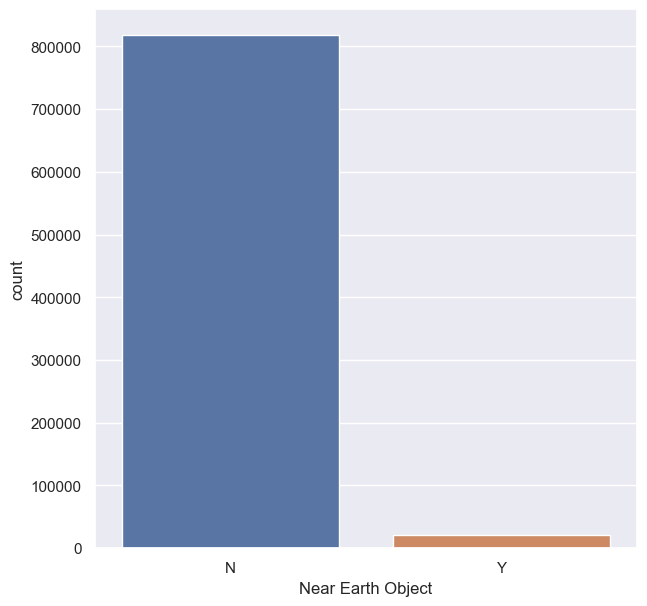

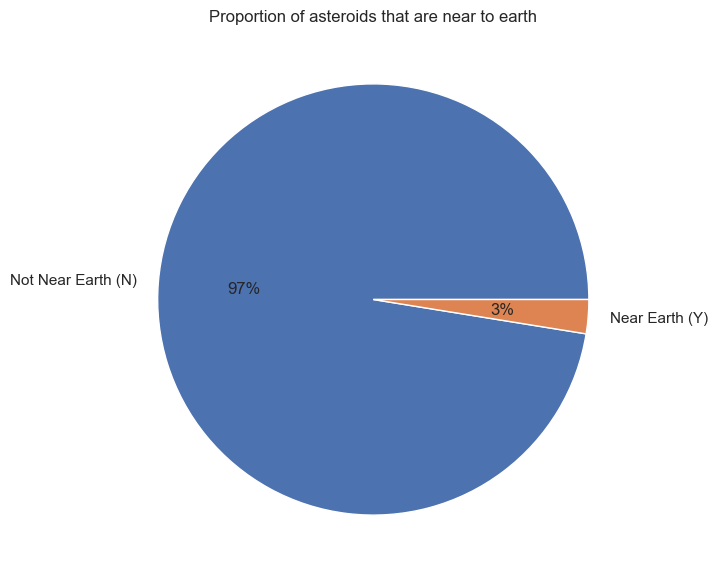

There are 21389 potential asteroids that are near to earth and 818341 that are not.


In [62]:
# Remove rows with missing values first
df_clean = df.dropna(subset=['Near Earth Object'])

# Create visualizations
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data=df_clean, x='Near Earth Object')
plt.show()

# Get counts (Y=1, N=0 in value_counts by default order)
near_earth = df_clean["Near Earth Object"].value_counts()['Y']
not_near_earth = df_clean["Near Earth Object"].value_counts()['N']

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(df_clean["Near Earth Object"].value_counts().values,
        labels=['Not Near Earth (N)', 'Near Earth (Y)'], 
        autopct="%1.0f%%")
plt.title("Proportion of asteroids that are near to earth")
plt.show()

print("There are " + str(near_earth) + " potential asteroids that are near to earth " 
      + "and " + str(not_near_earth) + " that are not.")

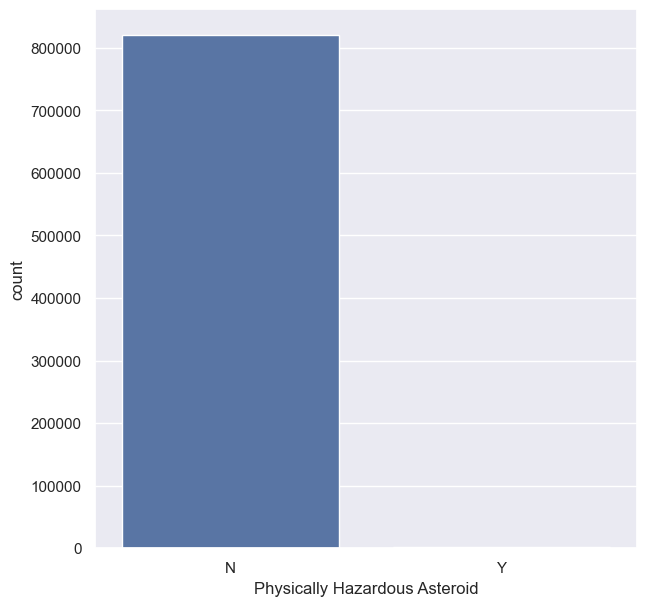

Unique values: ['N' 'Y' nan]
Value counts:
Physically Hazardous Asteroid
N    820800
Y      2014
Name: count, dtype: int64


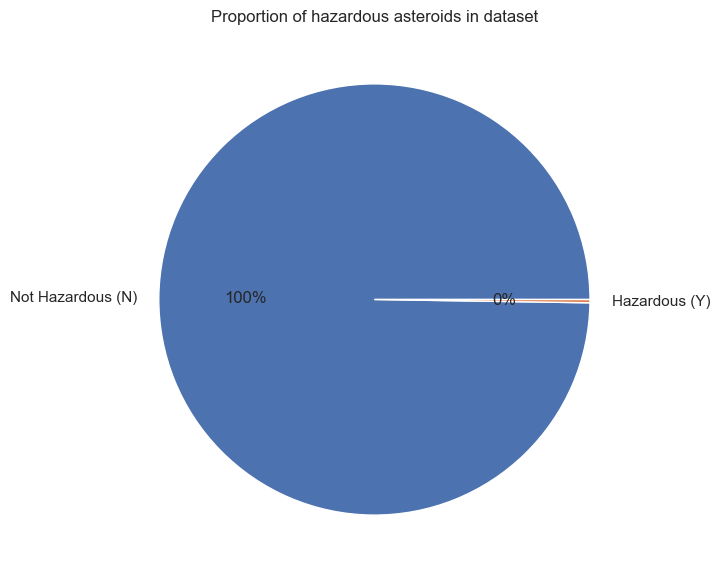

There are 2014 potential asteroids that can collide and 820800 that might miss the collision.


In [63]:
# Fix the countplot syntax
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data=df, x='Physically Hazardous Asteroid')  # Use data parameter
plt.show()

# Get counts - but first check what values you have
print("Unique values:", df['Physically Hazardous Asteroid'].unique())
print("Value counts:")
print(df['Physically Hazardous Asteroid'].value_counts())

# Clean data and get counts
df_clean = df.dropna(subset=['Physically Hazardous Asteroid'])
hazardous = df_clean["Physically Hazardous Asteroid"].value_counts()['Y']  # Use actual values
not_hazardous = df_clean["Physically Hazardous Asteroid"].value_counts()['N']  # Use actual values

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(df_clean["Physically Hazardous Asteroid"].value_counts().values,
        labels=['Not Hazardous (N)', 'Hazardous (Y)'], 
        autopct="%1.0f%%")
plt.title("Proportion of hazardous asteroids in dataset")
plt.show()

print("There are " + str(hazardous) + " potential asteroids that can collide " 
      + "and " + str(not_hazardous) + " that might miss the collision.")

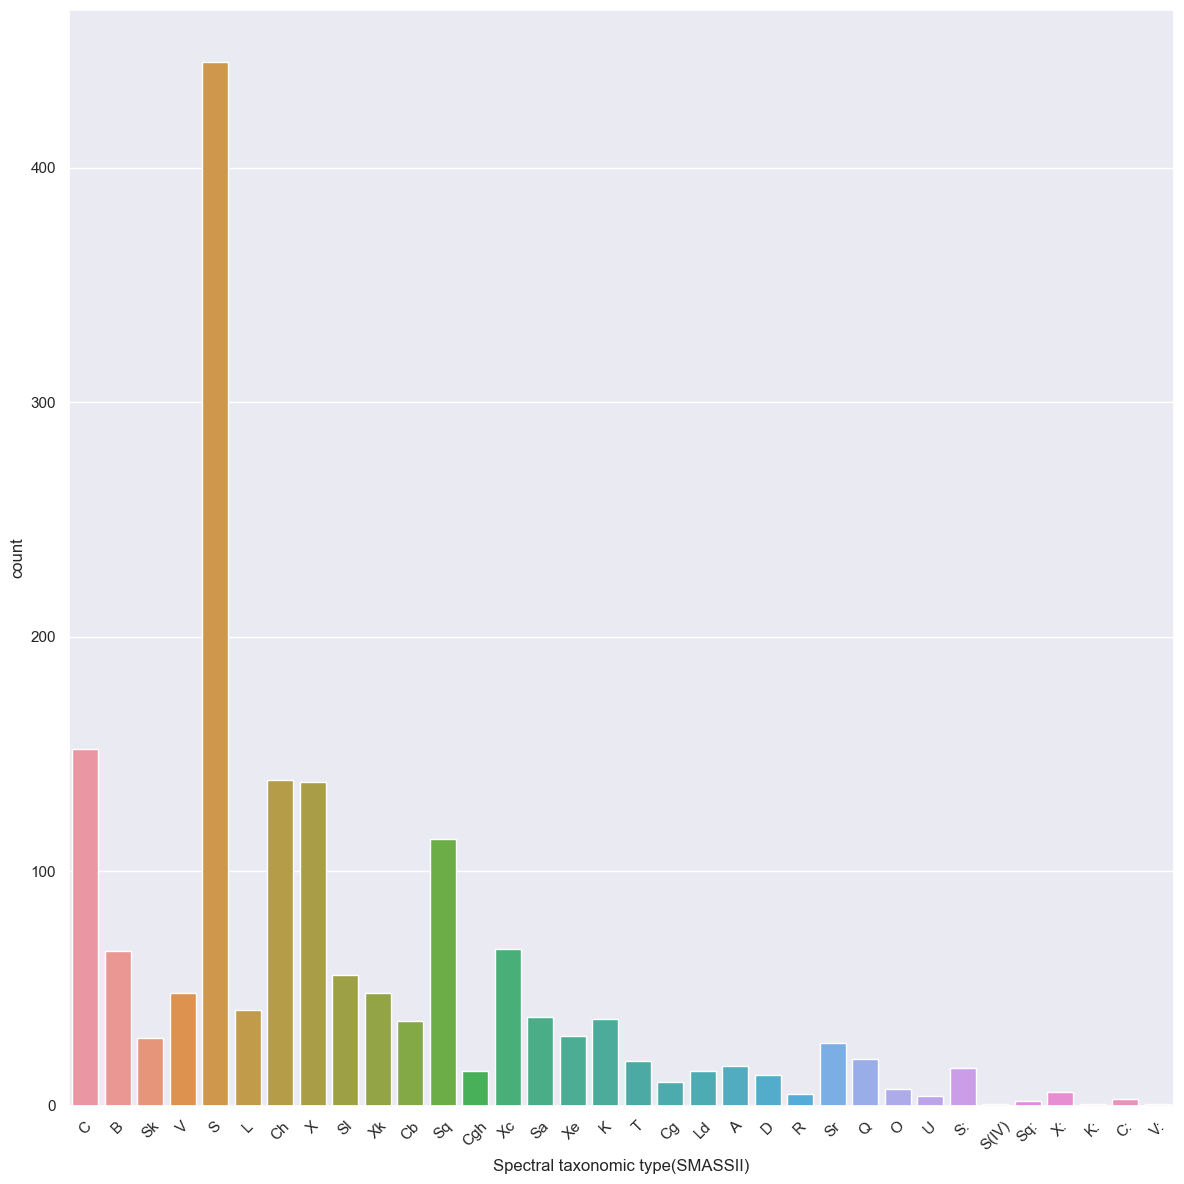

In [64]:
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(data=df, x='Spectral taxonomic type(SMASSII)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

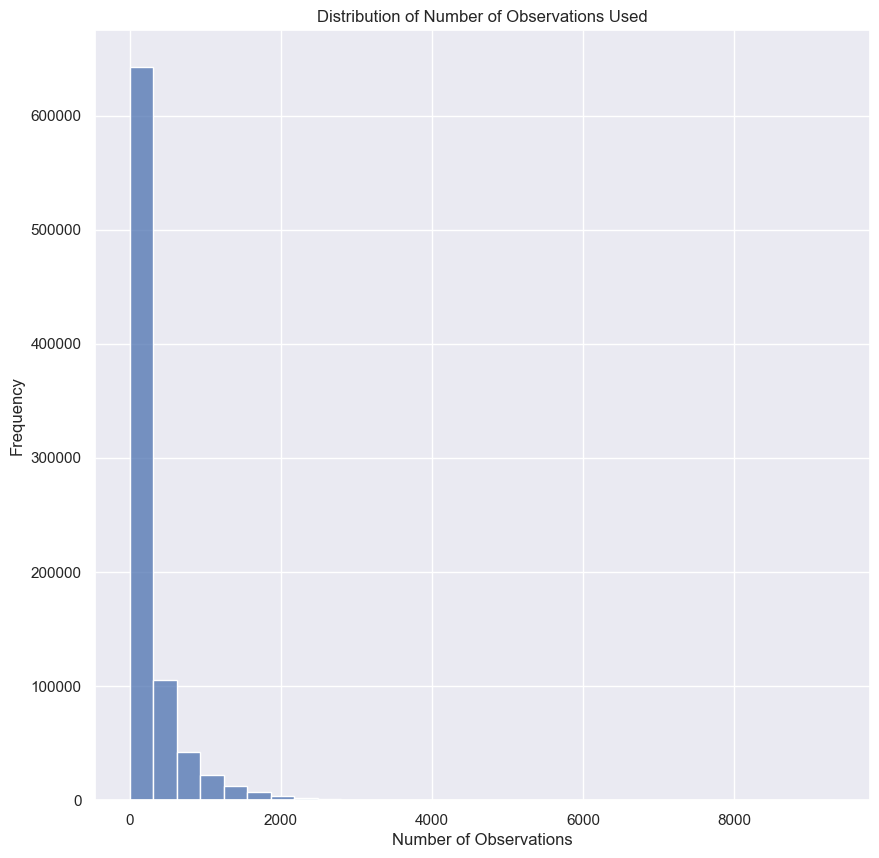

In [65]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(data=df, x='Number of observation used', bins=30)
plt.title('Distribution of Number of Observations Used')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

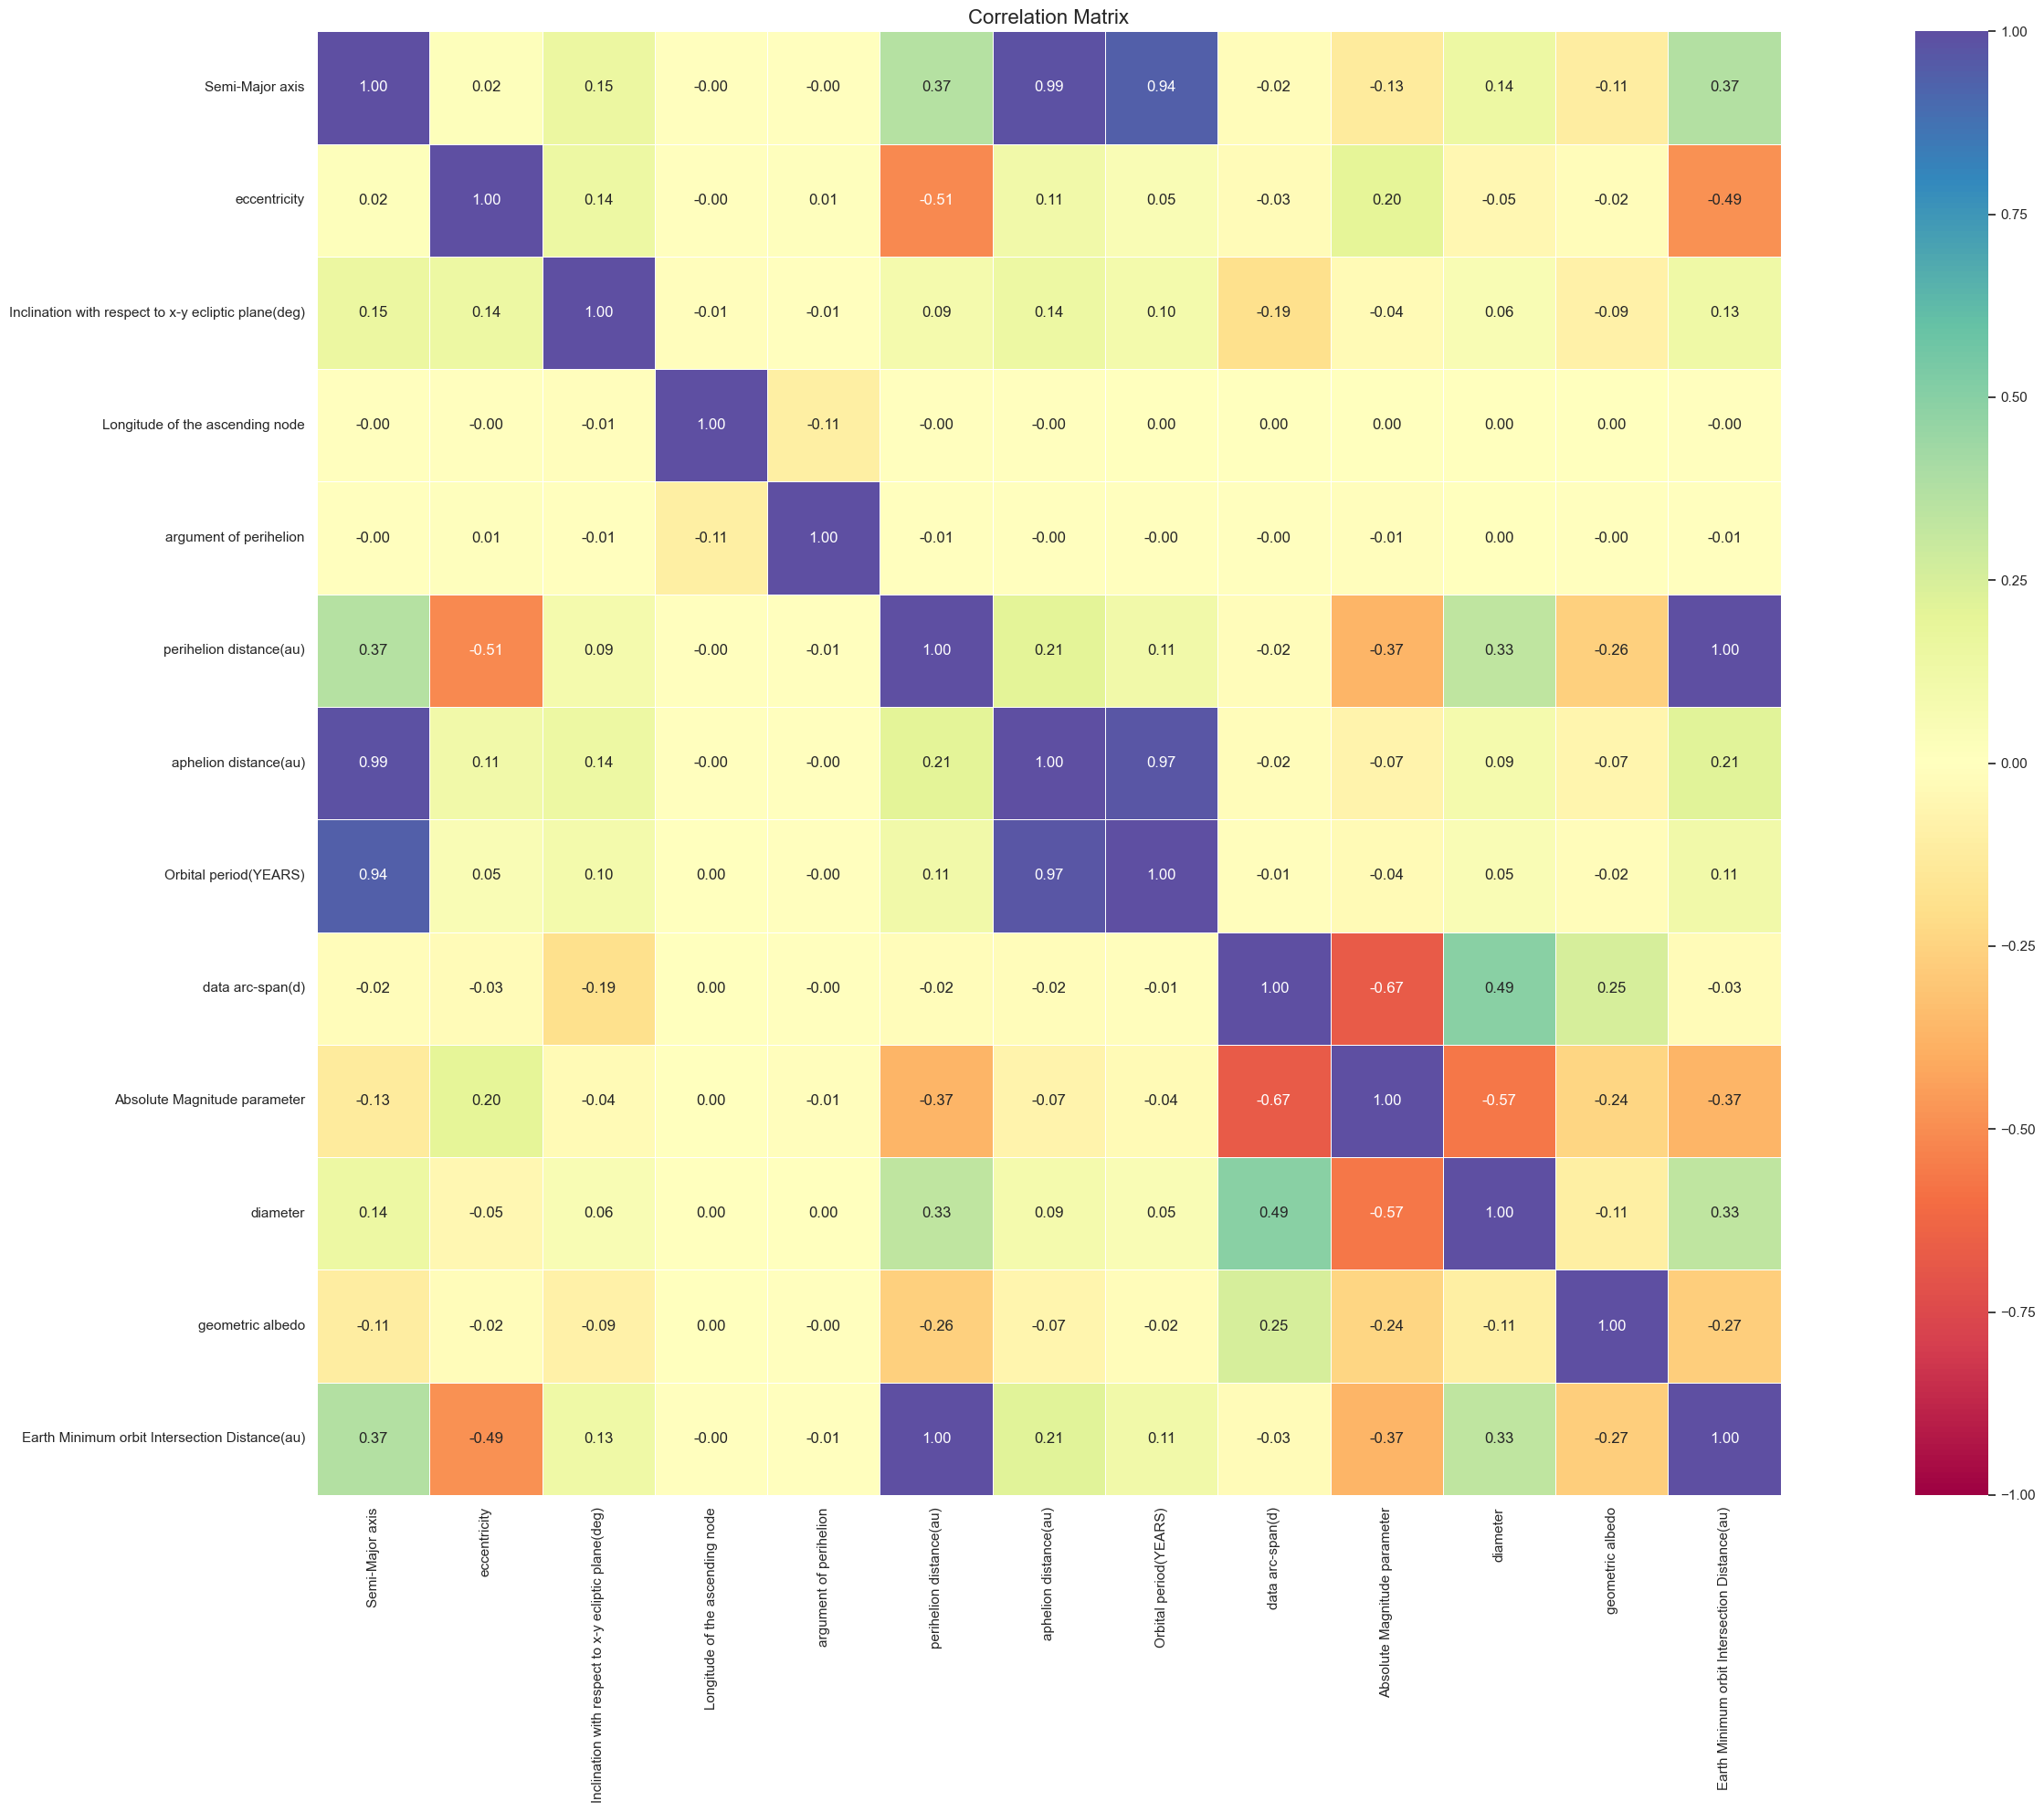

In [66]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(dataframe.corr(), 
            vmin=-1, 
            vmax=1, 
            cmap="Spectral", 
            annot=True,
            fmt='.2f',
            square=True,  # Make cells square
            linewidths=0.5)  # Add grid lines
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()
plt.close()

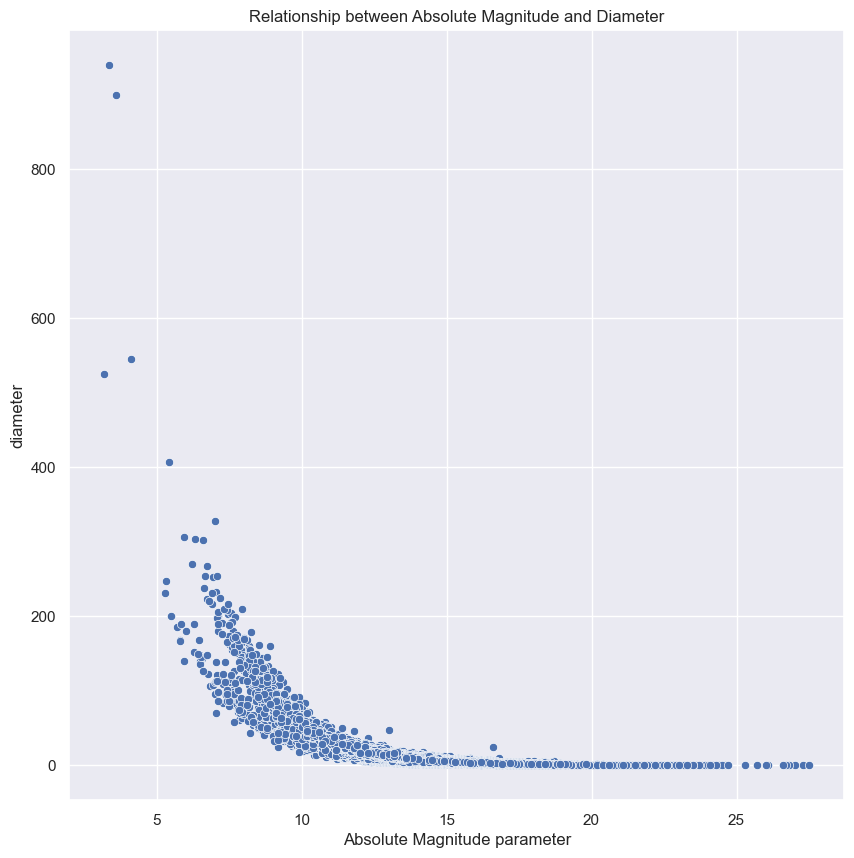

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataframe,
                x='Absolute Magnitude parameter',
                y='diameter')
plt.title('Relationship between Absolute Magnitude and Diameter')
plt.show()

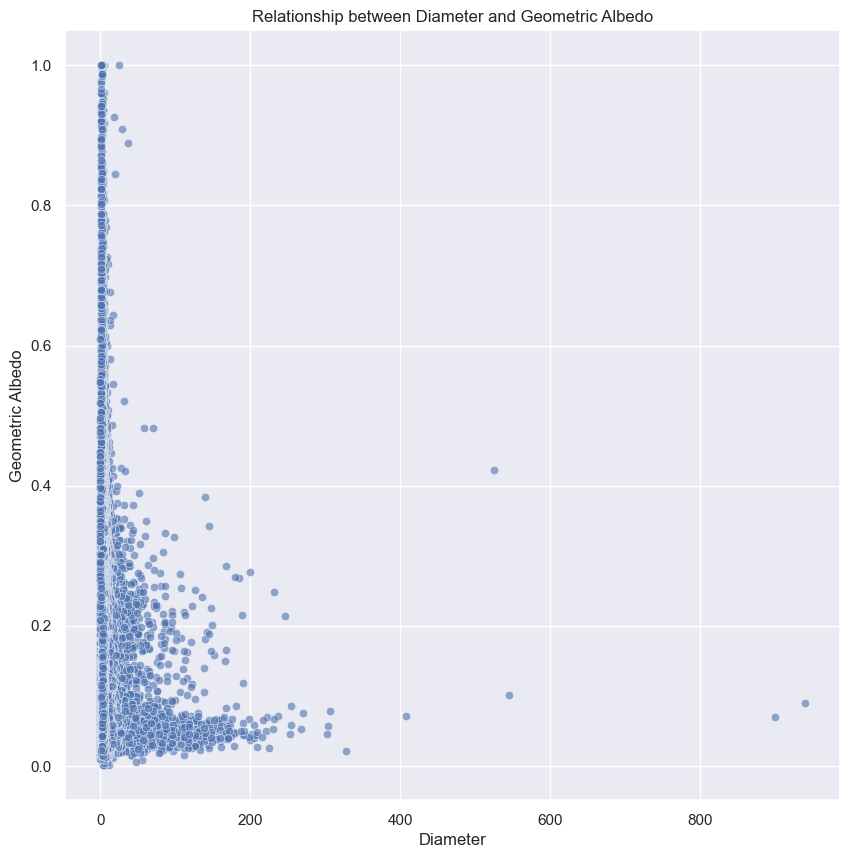

In [68]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=dataframe,
                x='diameter',
                y='geometric albedo',
                alpha=0.6)
plt.title('Relationship between Diameter and Geometric Albedo')
plt.xlabel('Diameter')
plt.ylabel('Geometric Albedo')
plt.show()

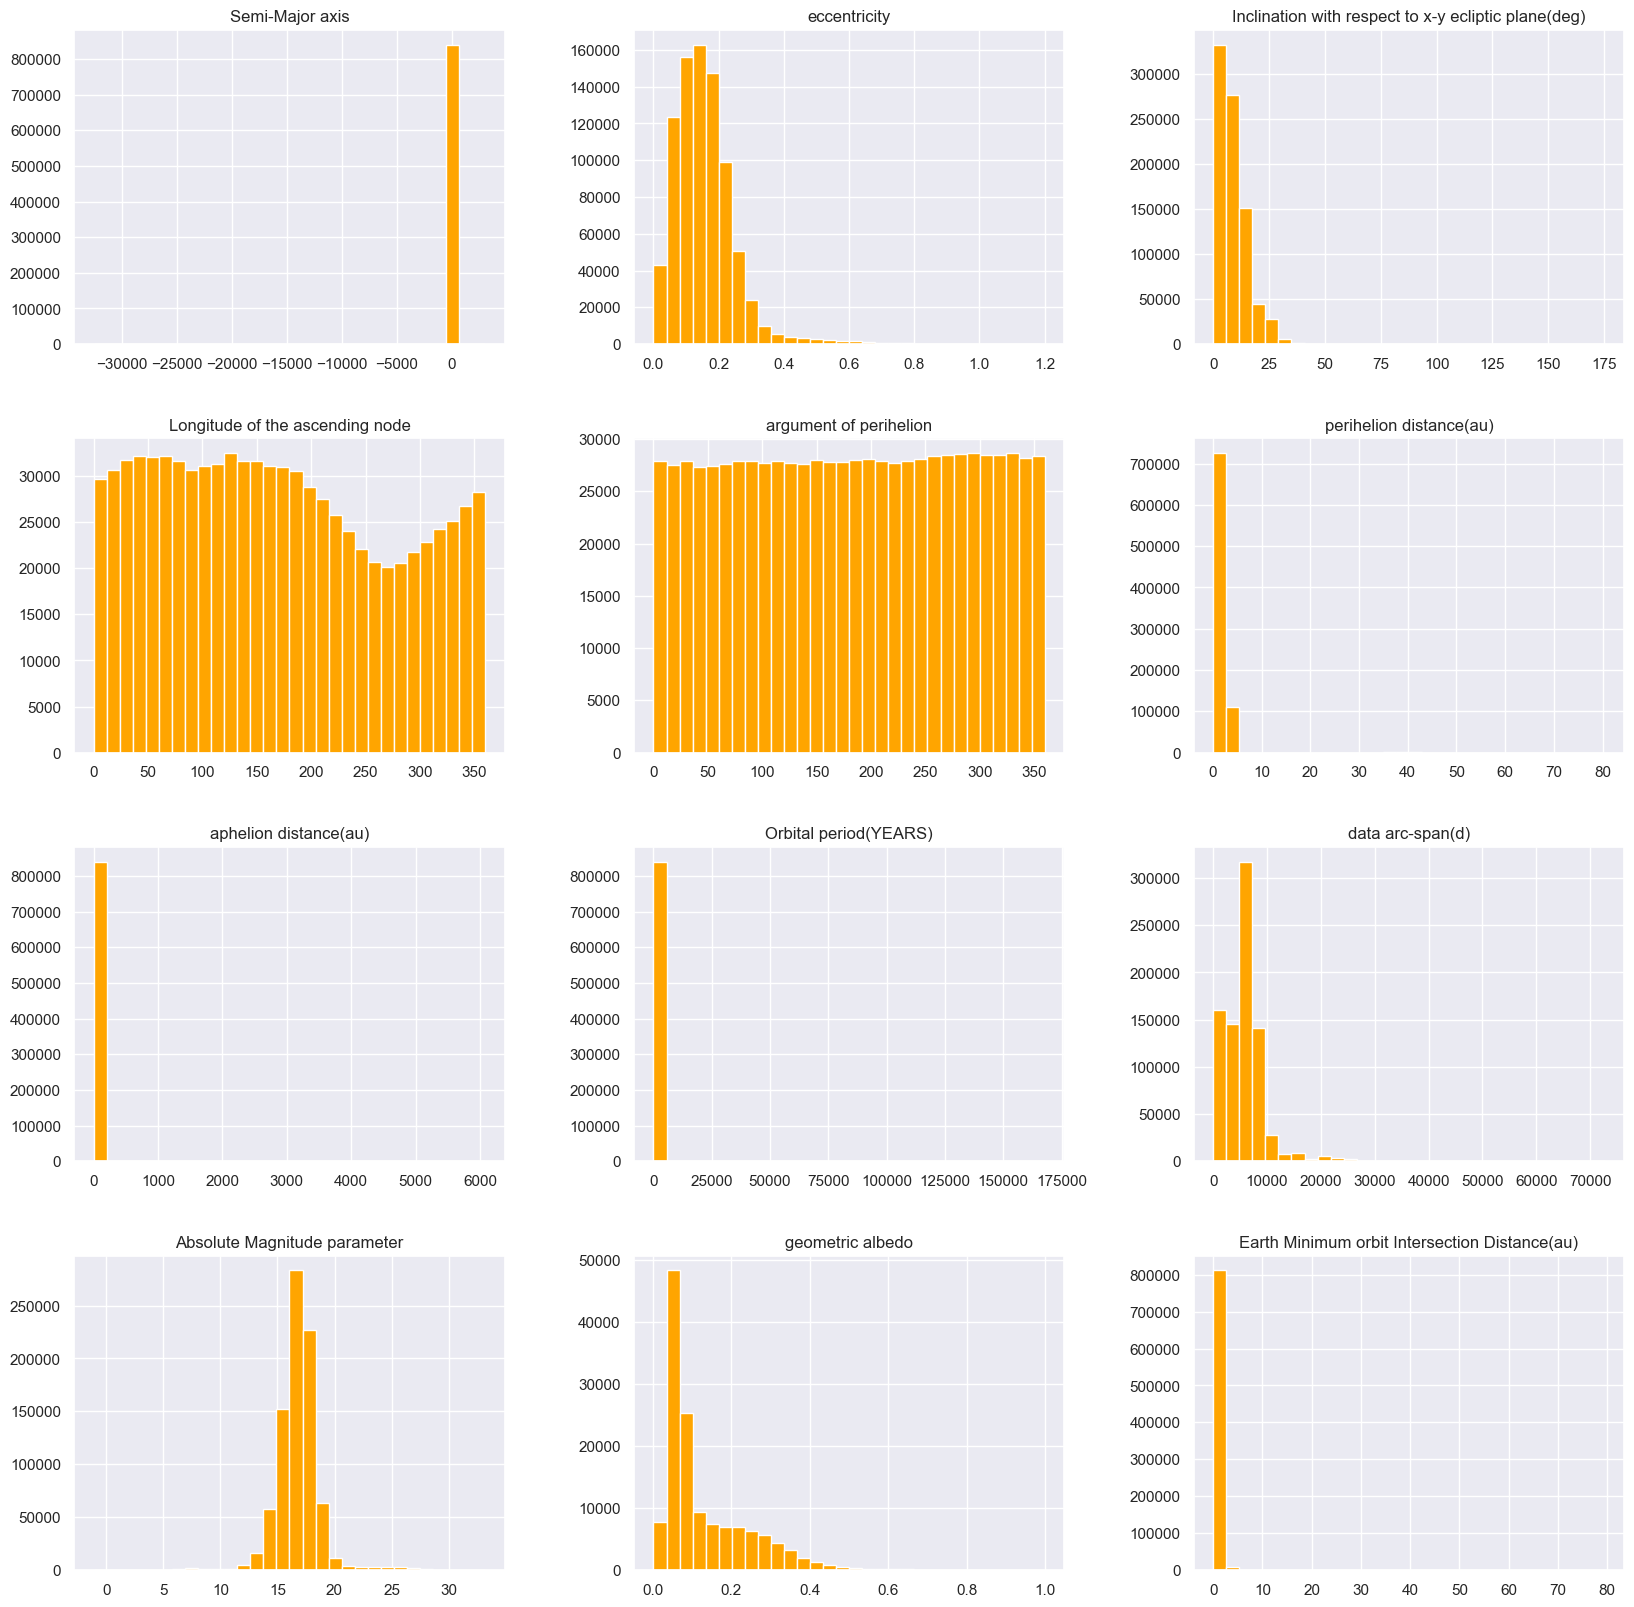

In [69]:
df_new.hist(bins = 30, figsize = (20,20), color='orange')
plt.show()

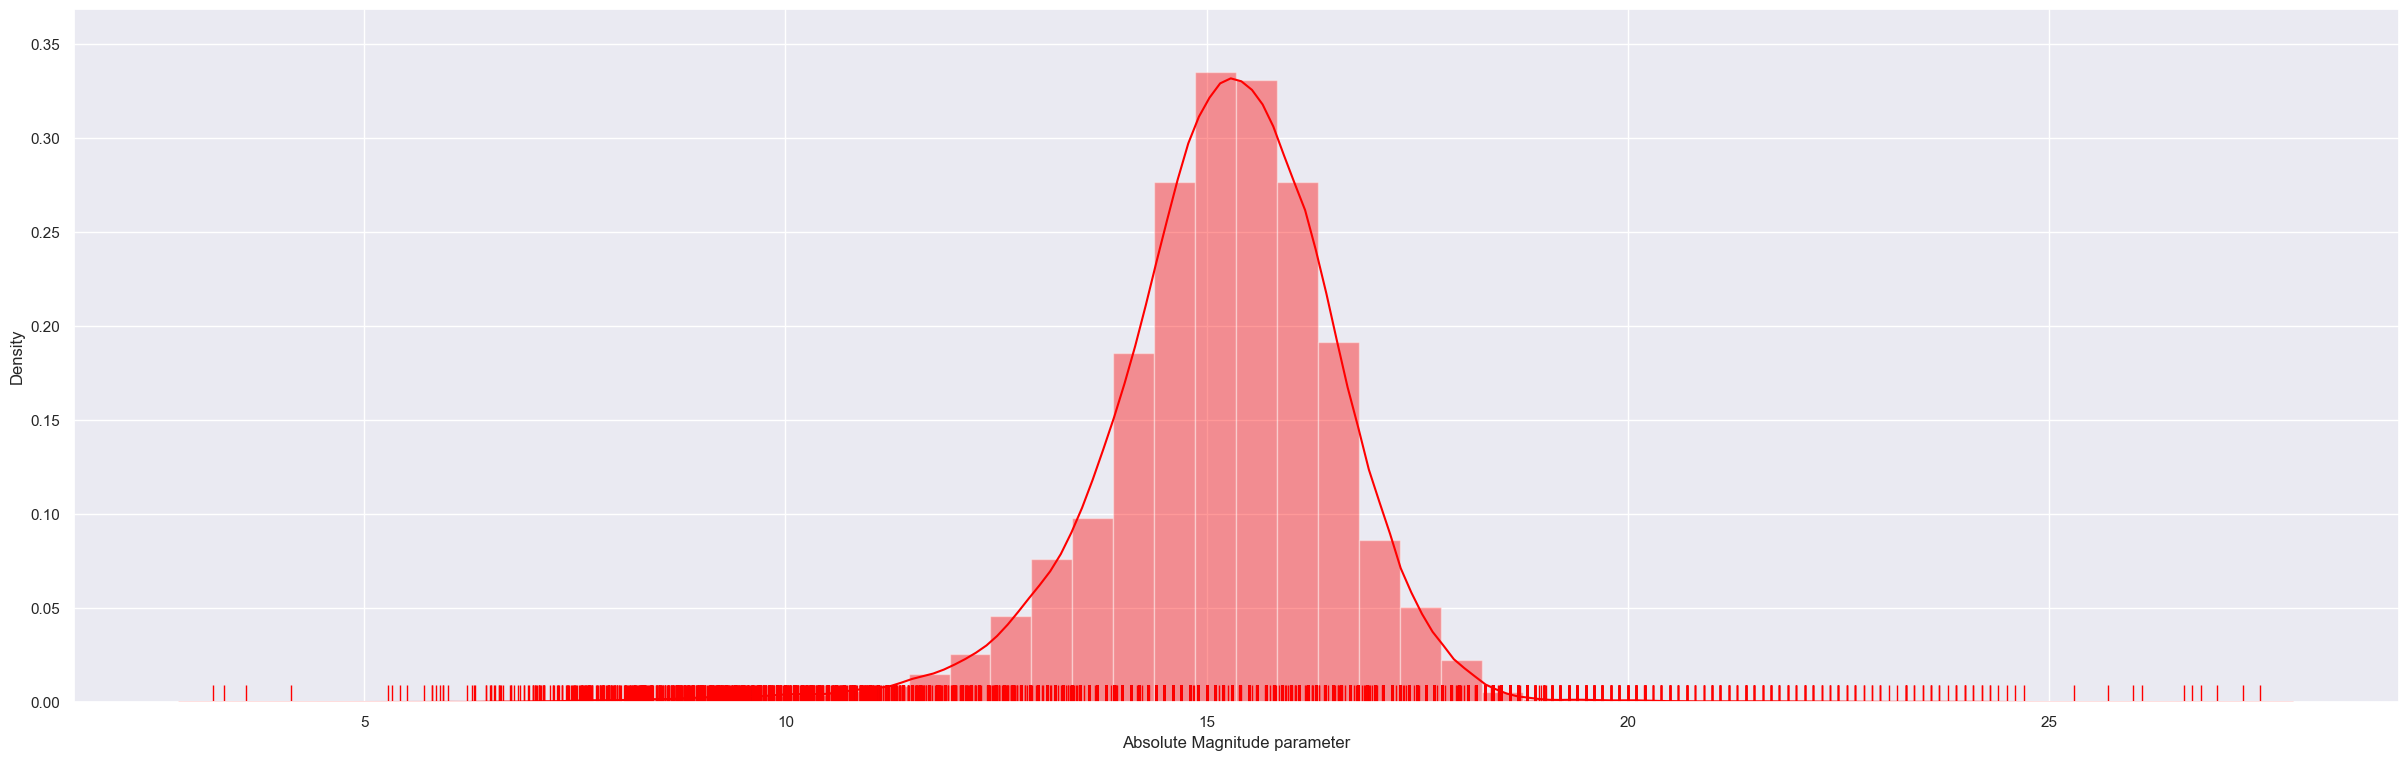

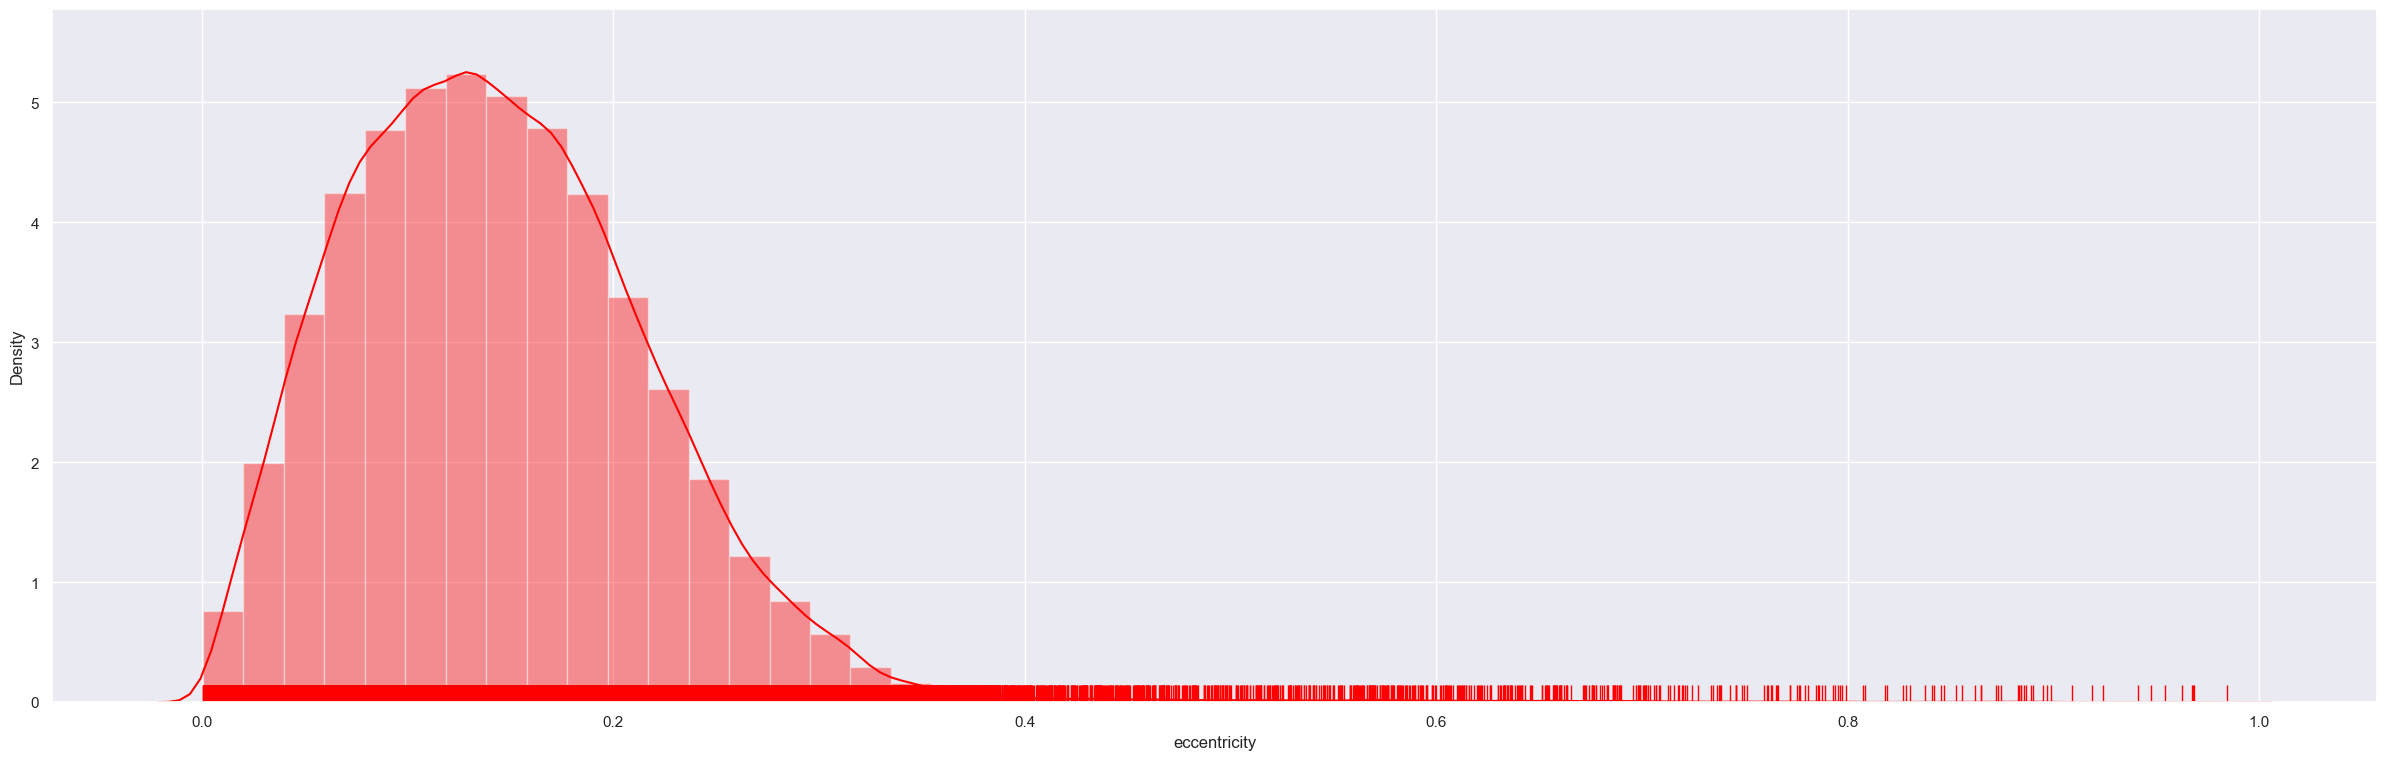

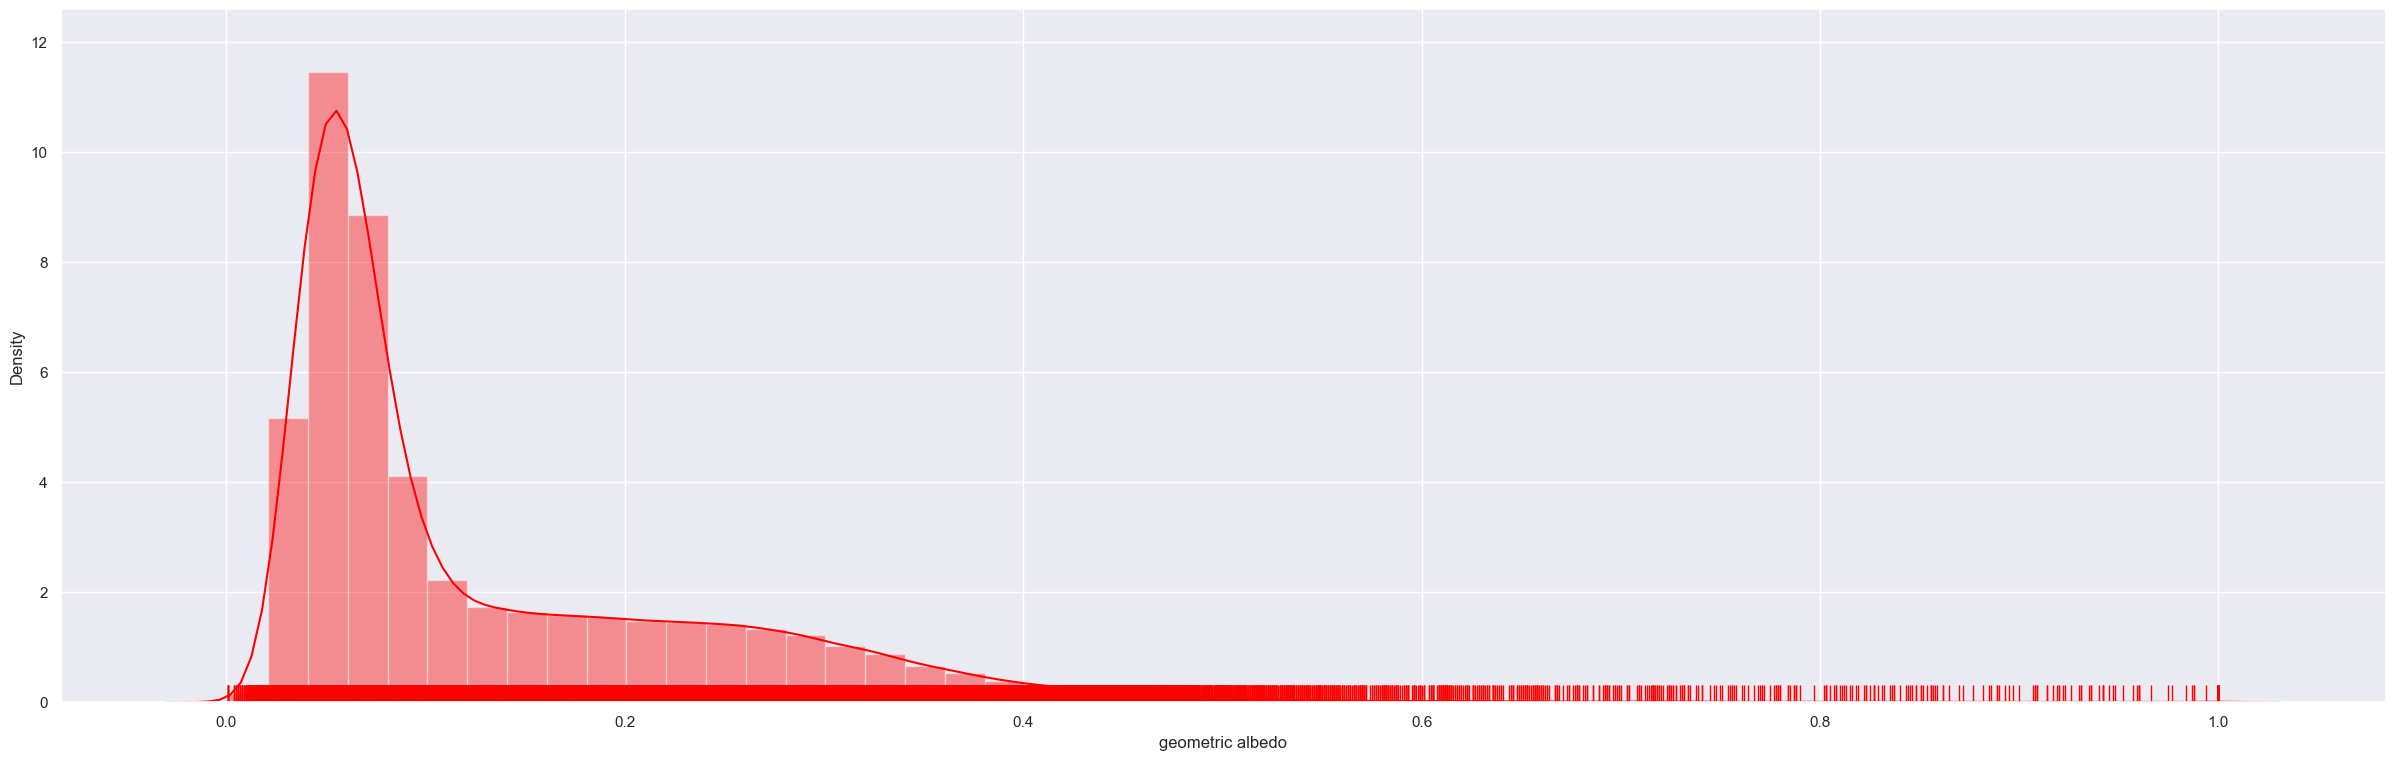

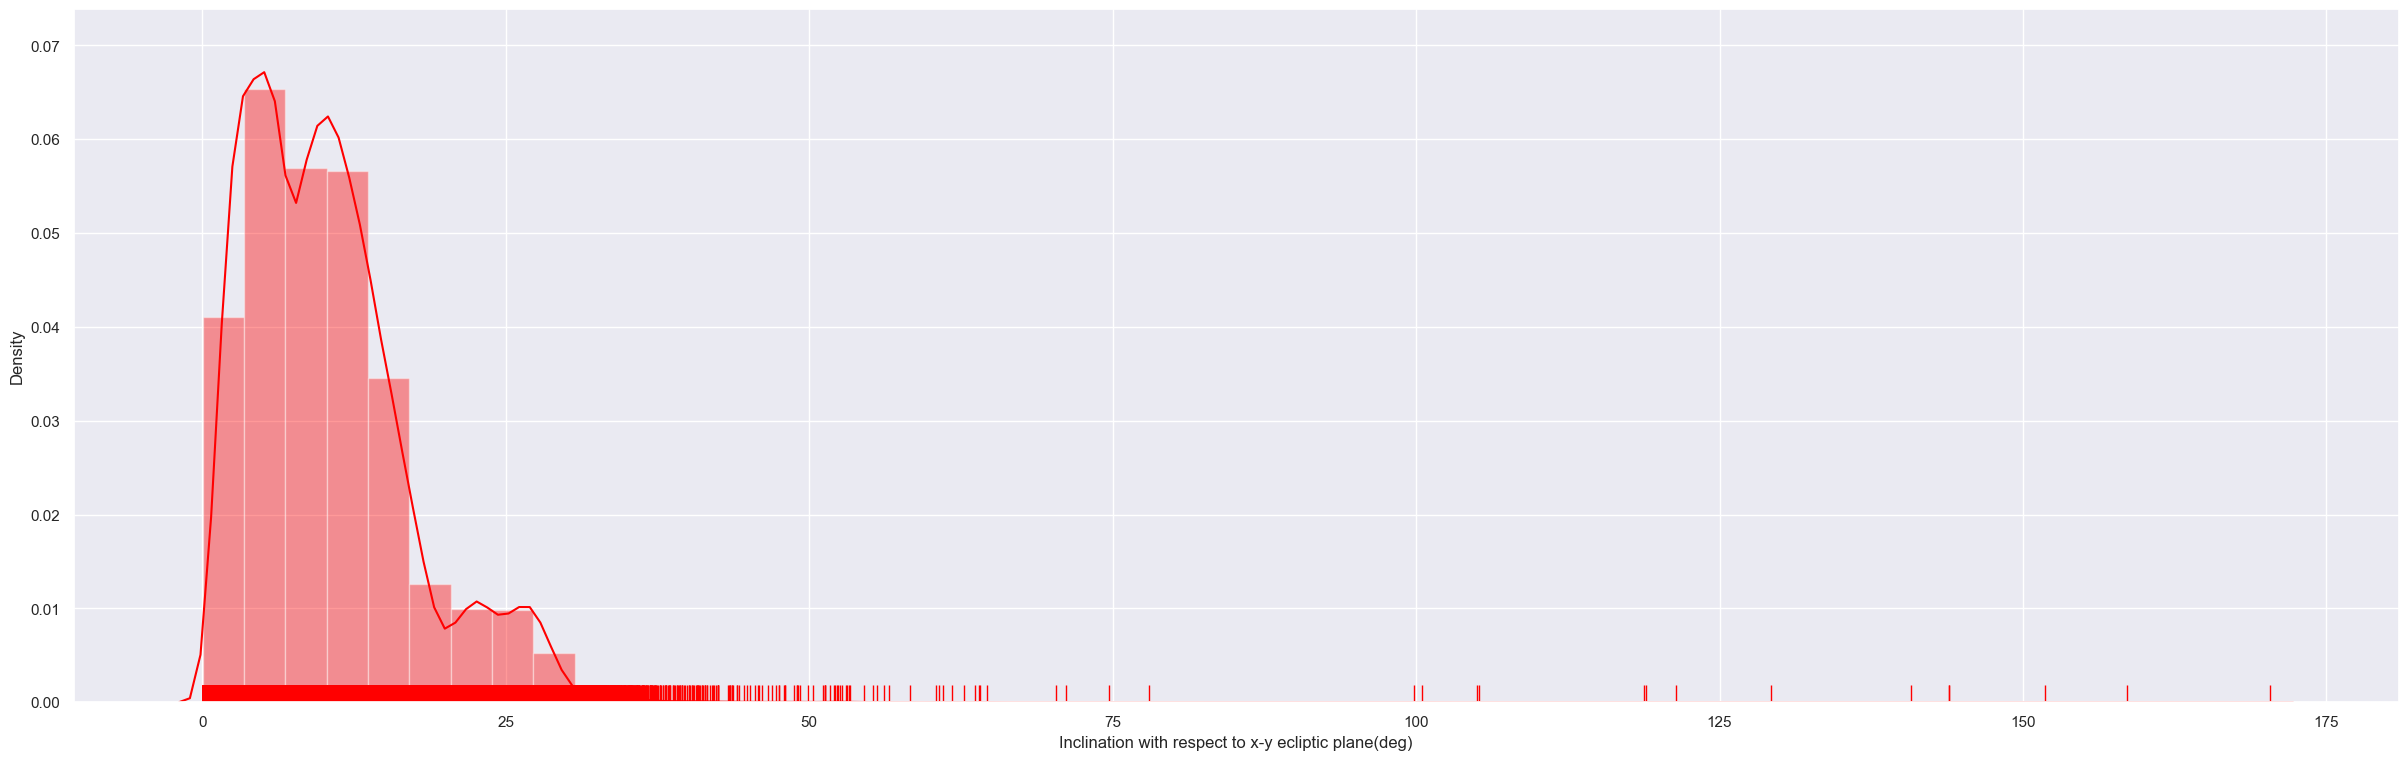

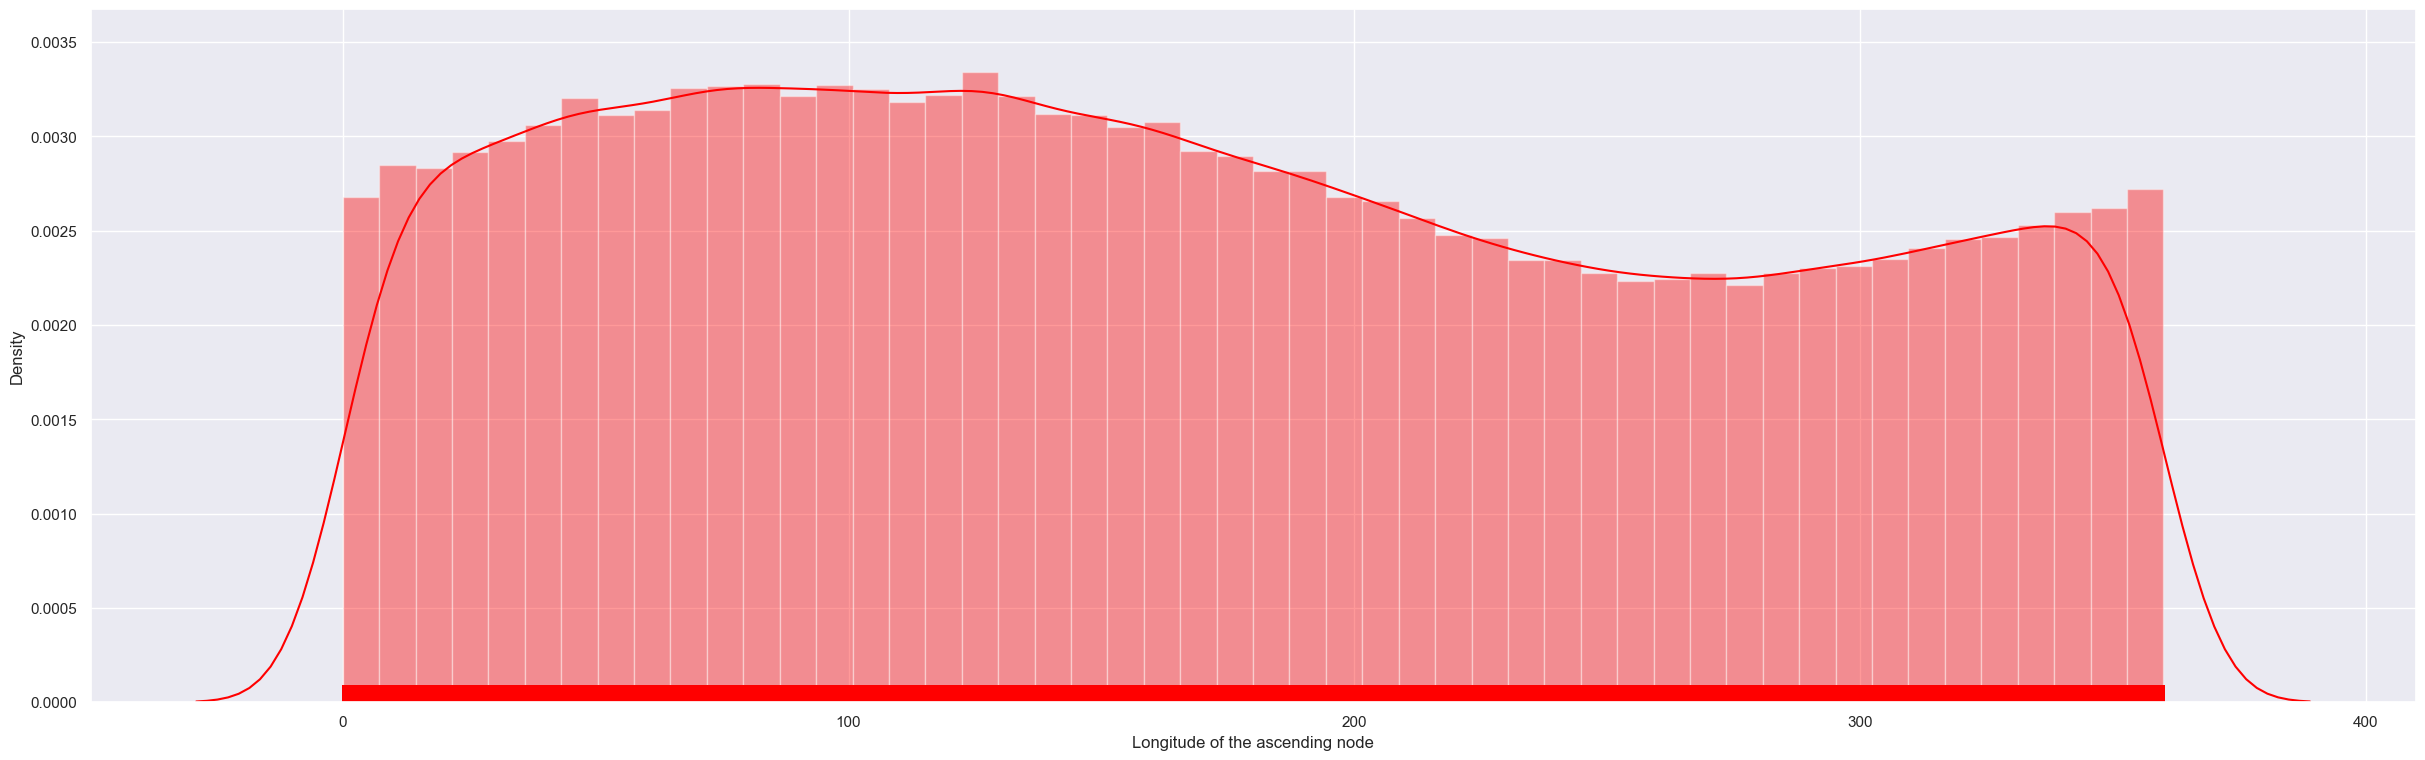

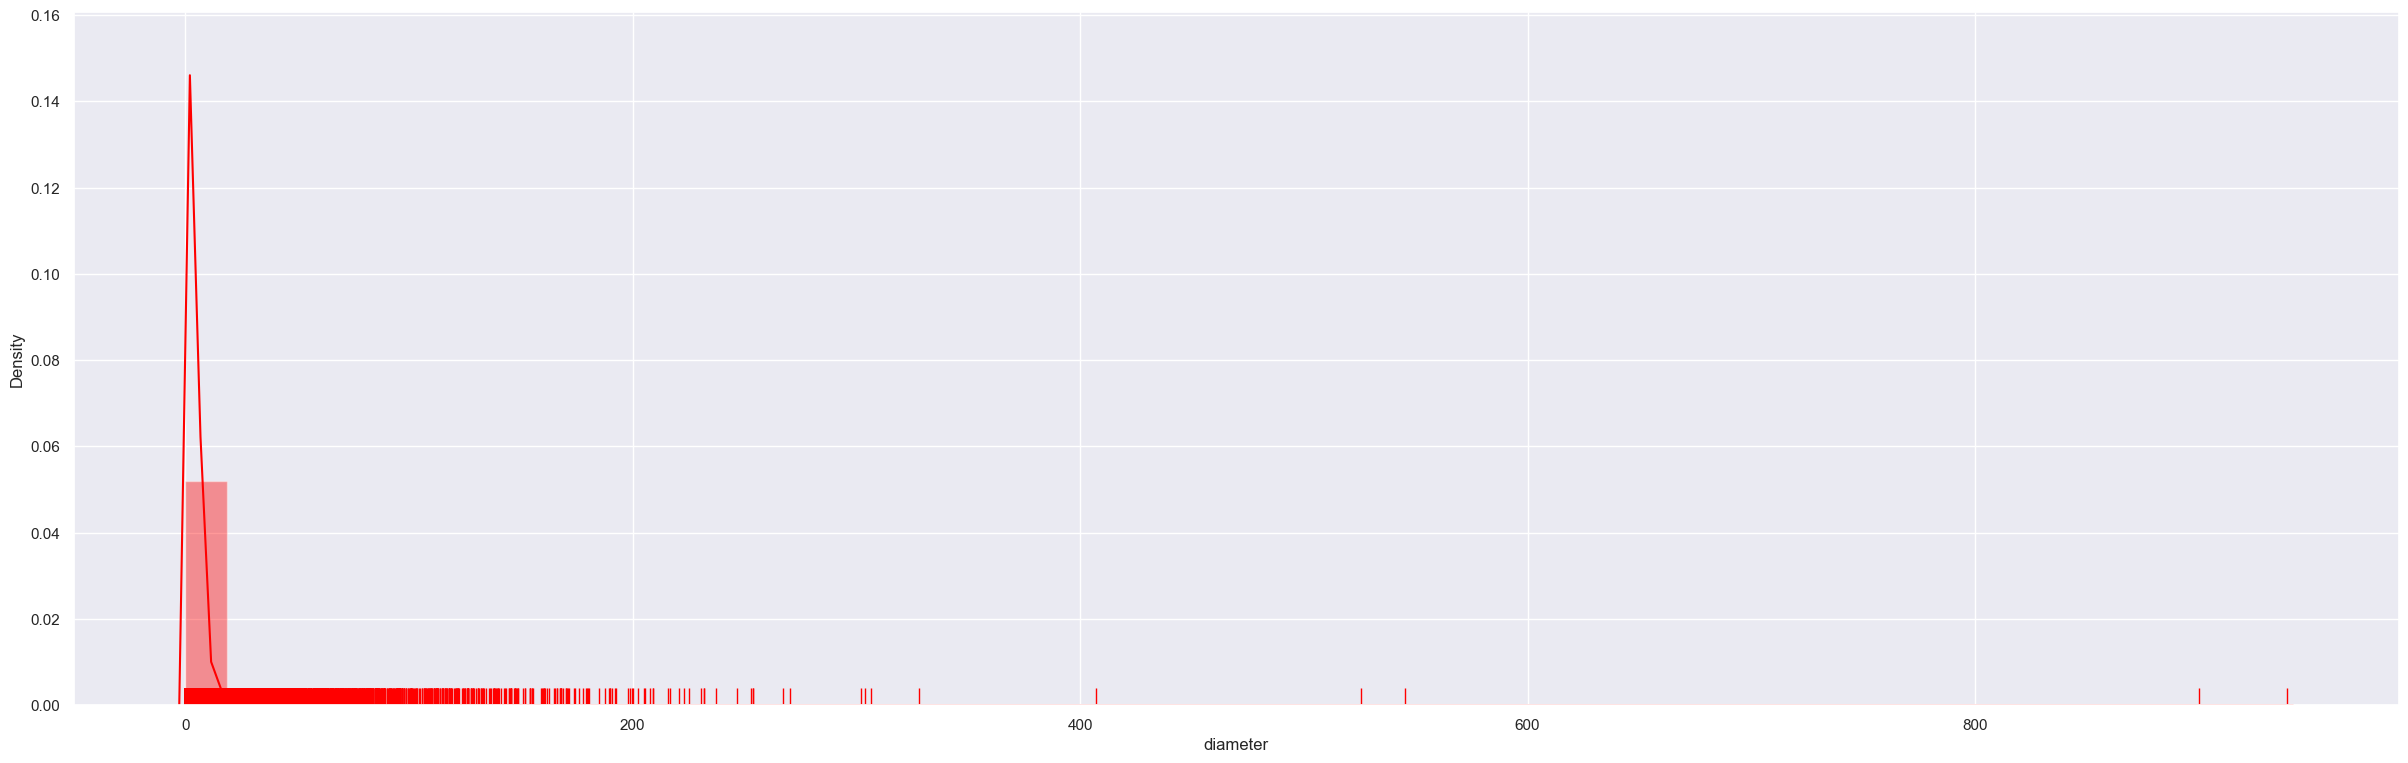

In [87]:
def plot_distribution(features):  # Changed function name
    plt.rcParams['figure.figsize'] = (30,9)
    sns.distplot(dataframe[features],
                hist = True,
                kde = True,
                rug = True,
                color = 'red')
    plt.show()

plot_distribution('Absolute Magnitude parameter')  # Call the renamed function
plot_distribution('eccentricity')
plot_distribution('geometric albedo')
plot_distribution('Inclination with respect to x-y ecliptic plane(deg)')
plot_distribution('Longitude of the ascending node')
plot_distribution('diameter')

# Data Modelling

In [88]:
def evaluation(tested,predicted,model):
    print("""The evaluation of this Model""")
    r2_test = metrics.r2_score(tested,predicted)
    kf = KFold(5,shuffle = True, random_state = 1)
    scores = cross_val_score(model, x, y, cv=kf, scoring = 'r2')
    print('R squared value:', r2_test)
    print("The scores are as following:",scores)
    print('The mean of the scores is:',scores.mean())
    print('Mean Squared Error is:',math.sqrt(mean_squared_error(tested,predicted)))
    

# Decision Tree

In [89]:
regressor_tree = DecisionTreeRegressor(max_depth = 12)
regressor_tree = regressor_tree.fit(x_train,y_train)
y_pred = regressor_tree.predict(x_test)

In [90]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = DecisionTreeRegressor(max_depth = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'max_depth':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,max_depth,train_acc,test_acc
0,1,0.511904,0.425345
1,2,0.717478,0.746368
2,3,0.836576,0.852460
3,4,0.908217,0.919109
4,5,0.953693,0.955916
5,6,0.971987,0.971468
6,7,0.982289,0.975762
7,8,0.987780,0.978953
8,9,0.991304,0.979110
9,10,0.993619,0.980822


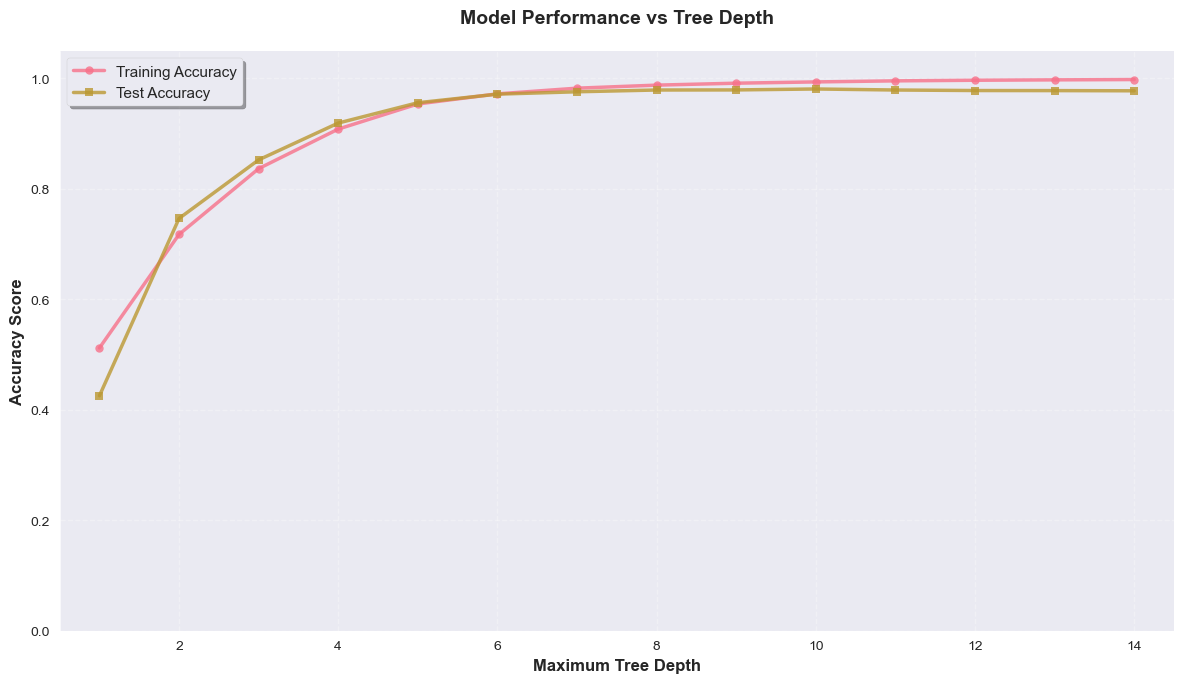

In [94]:
# Set style for better appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the plot with better styling
plt.figure(figsize=(12, 7))

# Plot with enhanced styling
plt.plot(dataframe['max_depth'], dataframe['train_acc'], 
         marker='o', linewidth=2.5, markersize=6, 
         label='Training Accuracy', alpha=0.8)
plt.plot(dataframe['max_depth'], dataframe['test_acc'], 
         marker='s', linewidth=2.5, markersize=6, 
         label='Test Accuracy', alpha=0.8)

# Enhanced labels and title
plt.xlabel('Maximum Tree Depth', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Tree Depth', fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=11)

# Set axis limits for better visualization
plt.ylim(0, 1.05)  # Assuming accuracy is between 0 and 1
plt.xlim(dataframe['max_depth'].min() - 0.5, dataframe['max_depth'].max() + 0.5)

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [95]:
evaluation(y_test,y_pred,regressor_tree)

The evaluation of this Model
R squared value: 0.9784993923856928
The scores are as following: [0.96146906 0.96007633 0.88970453 0.98306658 0.91180855]
The mean of the scores is: 0.941225008579527
Mean Squared Error is: 1.4520724095420634


# Ada Boost

In [97]:
regressor_Ada = AdaBoostRegressor(n_estimators = 5)
regressor_Ada = regressor_Ada.fit(x_train,y_train)
y_pred = regressor_Ada.predict(x_test)

In [98]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = AdaBoostRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.817748,0.861398
1,2,0.818093,0.779076
2,3,0.858045,0.828452
3,4,0.873672,0.824814
4,5,0.849151,0.808436
5,6,0.873401,0.896050
6,7,0.872611,0.833487
7,8,0.879022,0.795988
8,9,0.879780,0.848221
9,10,0.884428,0.837685


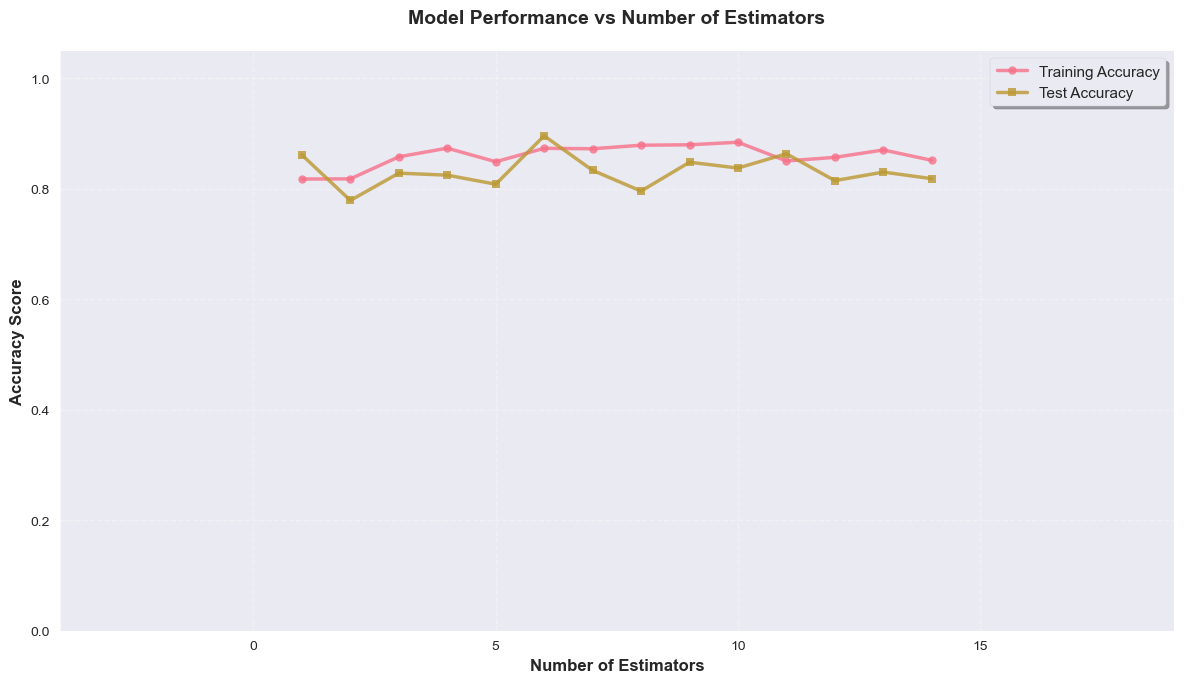

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the plot with better styling
plt.figure(figsize=(12, 7))

# Plot with enhanced styling
plt.plot(dataframe['n_estimators'], dataframe['train_acc'], 
         marker='o', linewidth=2.5, markersize=6, 
         label='Training Accuracy', alpha=0.8)
plt.plot(dataframe['n_estimators'], dataframe['test_acc'], 
         marker='s', linewidth=2.5, markersize=6, 
         label='Test Accuracy', alpha=0.8)

# Enhanced labels and title
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Number of Estimators', fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=11)

# Set axis limits for better visualization
plt.ylim(0, 1.05)  # Assuming accuracy is between 0 and 1
plt.xlim(dataframe['n_estimators'].min() - 5, dataframe['n_estimators'].max() + 5)

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
evaluation(y_test, y_pred,regressor_Ada)

The evaluation of this Model
R squared value: 0.8713955322691054
The scores are as following: [0.78739015 0.85858796 0.87341218 0.88439799 0.85067149]
The mean of the scores is: 0.8508919533234429
Mean Squared Error is: 3.551329222594983


# Multi Layer Perceptron

In [101]:
regressor_mlp = MLPRegressor(hidden_layer_sizes = 5)
regressor_mlp.fit(x_train, y_train)
y_pred = regressor_mlp.predict(x_test)

In [102]:
train_accuracy = []
test_accuracy = []
for depth in range(1,20):
    depth_model = MLPRegressor(hidden_layer_sizes = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'Hidden Layers':range(1,20), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,Hidden Layers,train_acc,test_acc
0,1,0.787074,0.713852
1,2,0.899537,0.849386
2,3,0.874254,0.784280
3,4,0.893318,0.818854
4,5,0.929779,0.870222
5,6,0.918620,0.879239
6,7,0.925422,0.856719
7,8,0.937385,0.908269
8,9,0.945074,0.917432
9,10,0.957557,0.923650


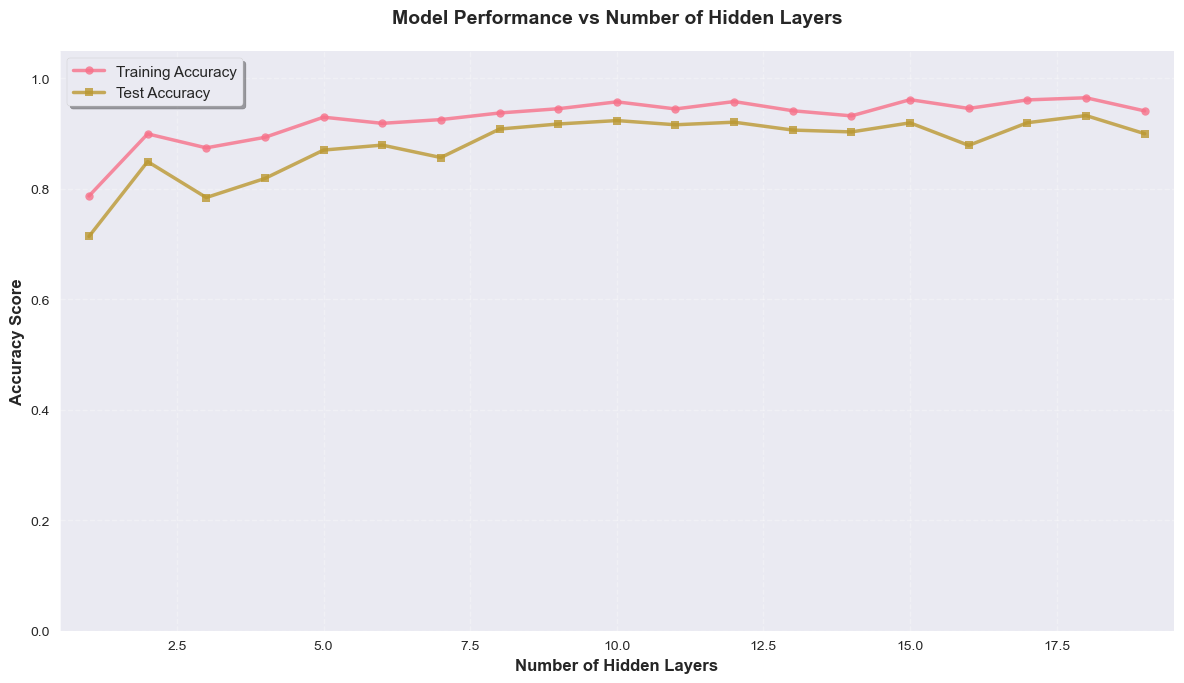

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the plot with better styling
plt.figure(figsize=(12, 7))

# Plot with enhanced styling
plt.plot(dataframe['Hidden Layers'], dataframe['train_acc'], 
         marker='o', linewidth=2.5, markersize=6, 
         label='Training Accuracy', alpha=0.8)
plt.plot(dataframe['Hidden Layers'], dataframe['test_acc'], 
         marker='s', linewidth=2.5, markersize=6, 
         label='Test Accuracy', alpha=0.8)

# Enhanced labels and title
plt.xlabel('Number of Hidden Layers', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Number of Hidden Layers', fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=11)

# Set axis limits for better visualization
plt.ylim(0, 1.05)  # Assuming accuracy is between 0 and 1
plt.xlim(dataframe['Hidden Layers'].min() - 0.5, dataframe['Hidden Layers'].max() + 0.5)

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [104]:
evaluation(y_test,y_pred,regressor_mlp)

The evaluation of this Model
R squared value: 0.8686603636177352
The scores are as following: [0.41719063 0.37369842 0.529573   0.40074318 0.27020485]
The mean of the scores is: 0.3982820163197484
Mean Squared Error is: 3.5888954898783147


# Random Forest

In [105]:
regressor_ensemble = RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor_ensemble.fit(x_train,y_train)
y_pred = regressor_ensemble.predict(x_test)

In [106]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = RandomForestRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.969945,0.928443
1,2,0.984168,0.957719
2,3,0.992792,0.978304
3,4,0.989358,0.970406
4,5,0.992803,0.987308
5,6,0.992850,0.924574
6,7,0.990185,0.959133
7,8,0.989442,0.935115
8,9,0.990833,0.978994
9,10,0.990218,0.966981


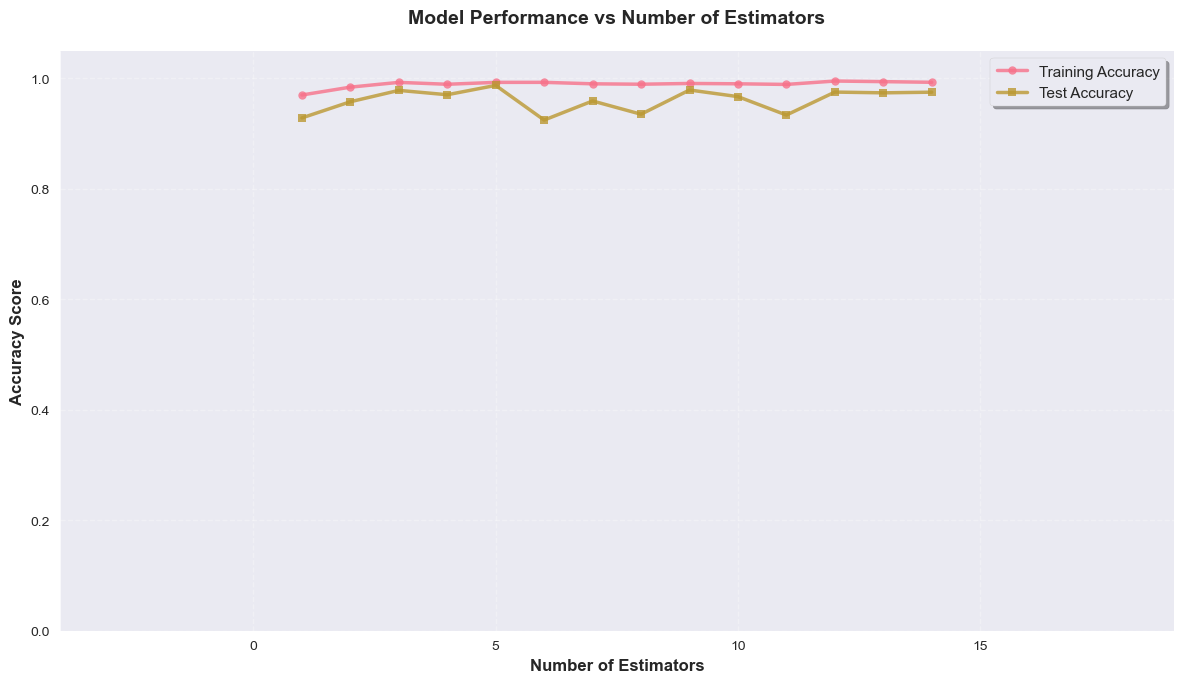

In [107]:
# Set style for better appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the plot with better styling
plt.figure(figsize=(12, 7))

# Plot with enhanced styling
plt.plot(dataframe['n_estimators'], dataframe['train_acc'], 
         marker='o', linewidth=2.5, markersize=6, 
         label='Training Accuracy', alpha=0.8)
plt.plot(dataframe['n_estimators'], dataframe['test_acc'], 
         marker='s', linewidth=2.5, markersize=6, 
         label='Test Accuracy', alpha=0.8)

# Enhanced labels and title
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Number of Estimators', fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=11)

# Set axis limits for better visualization
plt.ylim(0, 1.05)  # Assuming accuracy is between 0 and 1
plt.xlim(dataframe['n_estimators'].min() - 5, dataframe['n_estimators'].max() + 5)

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [108]:
evaluation(y_test, y_pred, regressor_ensemble)

The evaluation of this Model
R squared value: 0.9483373105731397
The scores are as following: [0.97518698 0.97455746 0.9519993  0.96527271 0.95900277]
The mean of the scores is: 0.9652038415187894
Mean Squared Error is: 2.2508751795667963


# Gradient Boosting

In [109]:
regressor_boosting = GradientBoostingRegressor(n_estimators = 8)
regressor_boosting.fit(x_train, y_train)
y_pred = regressor_boosting.predict(x_test)

In [110]:
train_accuracy = []
test_accuracy = []
for depth in range(1,30):
    depth_model = GradientBoostingRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,30), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.158949,0.139796
1,2,0.289498,0.252577
2,3,0.395962,0.371123
3,4,0.487125,0.462317
4,5,0.561547,0.537961
5,6,0.624656,0.592807
6,7,0.677861,0.644529
7,8,0.721469,0.693510
8,9,0.759482,0.735054
9,10,0.791582,0.768252


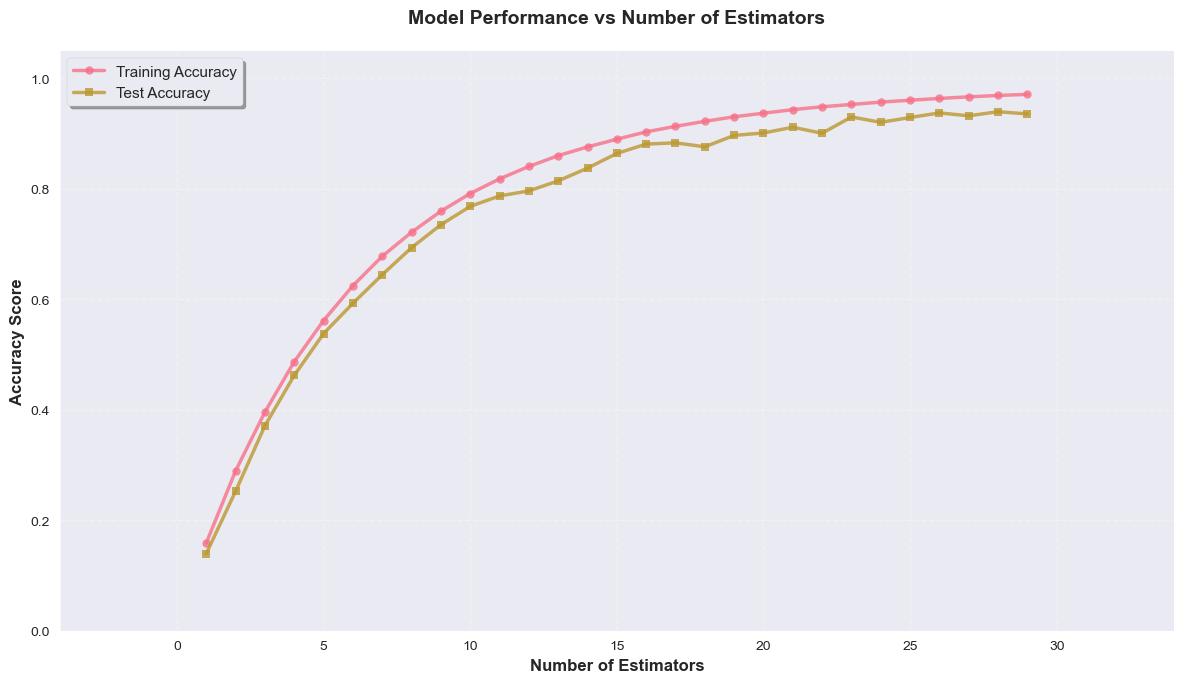

In [111]:
# Set style for better appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the plot with better styling
plt.figure(figsize=(12, 7))

# Plot with enhanced styling
plt.plot(dataframe['n_estimators'], dataframe['train_acc'], 
         marker='o', linewidth=2.5, markersize=6, 
         label='Training Accuracy', alpha=0.8)
plt.plot(dataframe['n_estimators'], dataframe['test_acc'], 
         marker='s', linewidth=2.5, markersize=6, 
         label='Test Accuracy', alpha=0.8)

# Enhanced labels and title
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Number of Estimators', fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=11)

# Set axis limits for better visualization
plt.ylim(0, 1.05)  # Assuming accuracy is between 0 and 1
plt.xlim(dataframe['n_estimators'].min() - 5, dataframe['n_estimators'].max() + 5)

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [113]:
evaluation(y_test, y_pred, regressor_boosting)   

The evaluation of this Model
R squared value: 0.6979910063857474
The scores are as following: [0.7256219  0.69301519 0.73182614 0.71522775 0.67662236]
The mean of the scores is: 0.7084626678672796
Mean Squared Error is: 5.442179285571966


# Model Comparison

In [114]:
models = [regressor_tree,regressor_Ada,regressor_mlp,regressor_ensemble,regressor_boosting]

In [115]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,x_test,y_test,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

DecisionTreeRegressor: 
----------
0.9175130306114788
4.254261972892813
------------------------------
AdaBoostRegressor: 
----------
0.7826886085814616
5.107842126633986
------------------------------
MLPRegressor: 
----------
0.5664271906389375
7.851772806618209
------------------------------
RandomForestRegressor: 
----------
0.9090541333954667
4.356326594199621
------------------------------
GradientBoostingRegressor: 
----------
0.6509177131892763
6.545057396665452
------------------------------


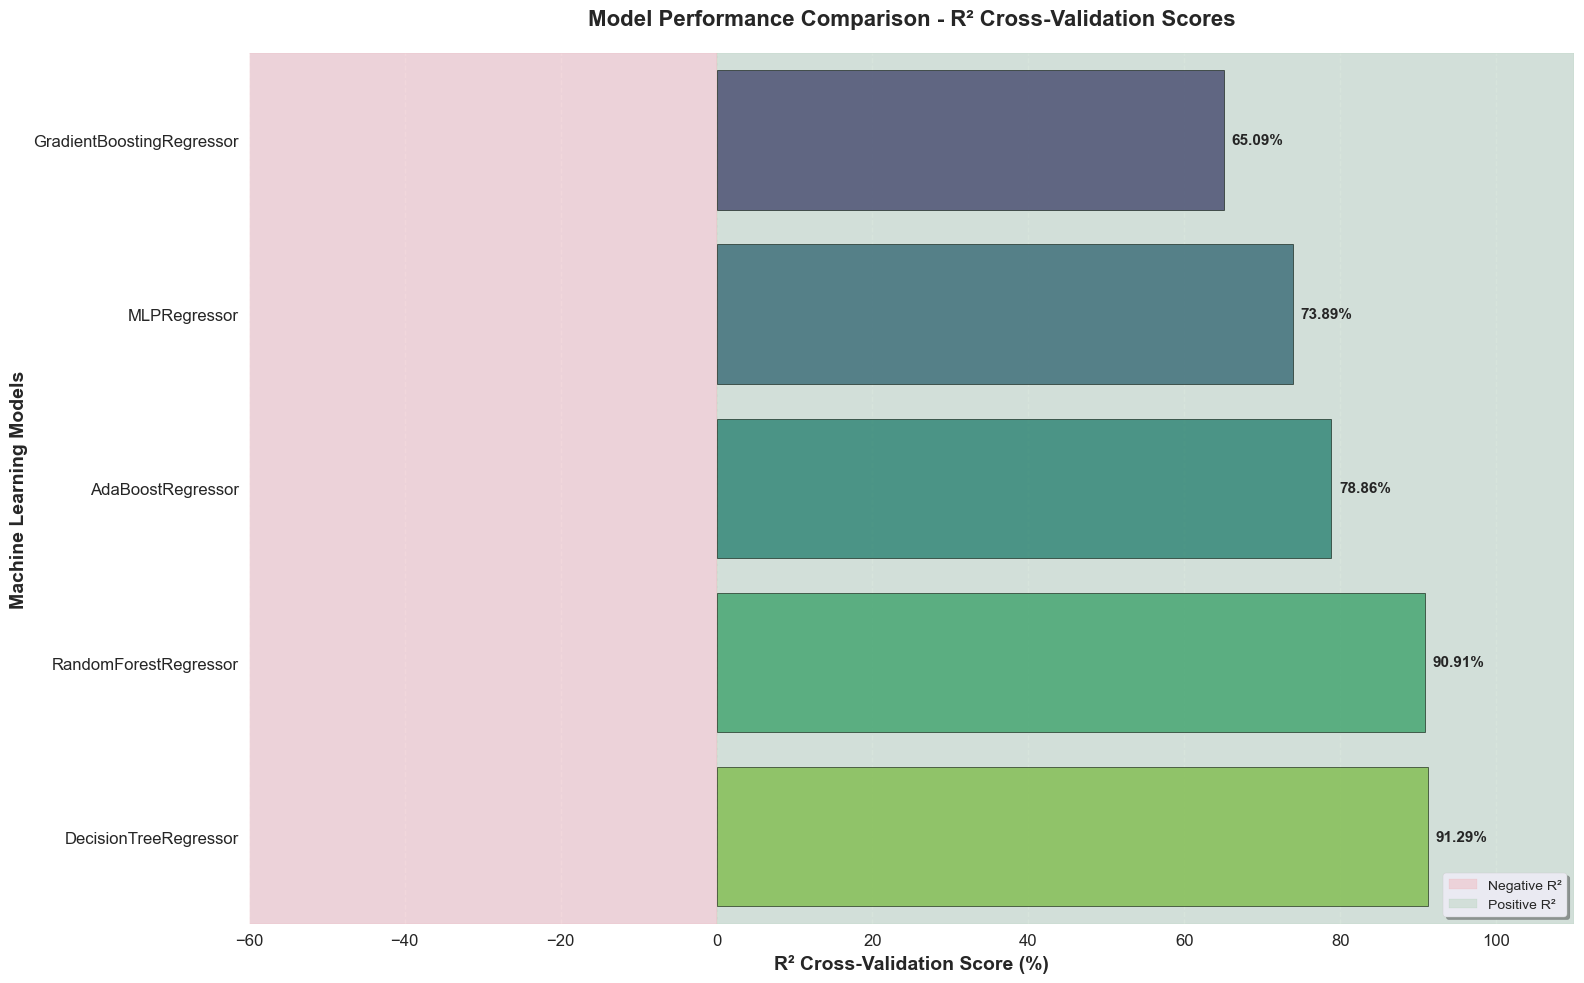

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Create results dataframe with improved approach
r = pd.DataFrame(columns=["MODELS", "R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, x_test, y_test, cv=10, scoring="r2").mean()
    error = -cross_val_score(model, x_test, y_test, cv=10, scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name, R2CV*100]], columns=["MODELS", "R2CV"])
    r = pd.concat([r, result], ignore_index=True)  # Using concat instead of deprecated append

# Sort by R2CV for better visualization
r = r.sort_values('R2CV', ascending=True)

# Set enhanced styling
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Create enhanced figure
figure = plt.figure(figsize=(16, 10))

# Create the barplot with enhanced styling
ax = sns.barplot(x="R2CV", y="MODELS", data=r, 
                palette="viridis", alpha=0.8, edgecolor='black', linewidth=0.5)

# Enhanced labels and title
plt.xlabel("R² Cross-Validation Score (%)", fontsize=14, fontweight='bold')
plt.ylabel("Machine Learning Models", fontsize=14, fontweight='bold')
plt.title("Model Performance Comparison - R² Cross-Validation Scores", 
          fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, v in enumerate(r['R2CV']):
    ax.text(v + 1, i, f'{v:.2f}%', va='center', fontweight='bold', fontsize=11)

# Enhanced grid and styling
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlim(-60, 110)  # Adjusted for better label visibility

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add background color distinction for positive vs negative scores
ax.axvspan(-60, 0, alpha=0.1, color='red', label='Negative R²')
ax.axvspan(0, 110, alpha=0.1, color='green', label='Positive R²')

# Rotate y-axis labels for better readability if needed
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)

# Add subtle legend
plt.legend(loc='lower right', frameon=True, fancybox=True, shadow=True, fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
df_new.head()

,Semi-Major axis,eccentricity,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Absolute Magnitude parameter,diameter,geometric albedo,Earth Minimum orbit Intersection Distance(au)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,939.4,0.0900,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,545,0.1010,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,246.596,0.2140,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,525.4,0.4228,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,6.85,106.699,0.2740,1.09589


# NEW STUFF

In [124]:
# Clean '\n' characters and convert to float
df_new['diameter'] = df_new['diameter'].astype(str).str.replace('\n', '', regex=True).astype(float)
df_new['Earth Minimum orbit Intersection Distance(au)'] = (
    df_new['Earth Minimum orbit Intersection Distance(au)']
    .astype(str)
    .str.replace('\n', '', regex=True)
    .astype(float)
)


In [125]:
df_new['risk_level'] = df_new.apply(label_risk, axis=1)

In [126]:
print(df_new[['diameter', 'Earth Minimum orbit Intersection Distance(au)']].dtypes)

diameter                                         float64
Earth Minimum orbit Intersection Distance(au)    float64
dtype: object


Class distribution:
 risk_level
2    45894
0    45894
1    45893
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      9179
           1       0.63      0.62      0.62      9179
           2       0.80      0.79      0.80      9179

    accuracy                           0.72     27537
   macro avg       0.72      0.72      0.72     27537
weighted avg       0.72      0.72      0.72     27537

Confusion Matrix:
 [[6889 1886  404]
 [2071 5666 1442]
 [ 488 1403 7288]]


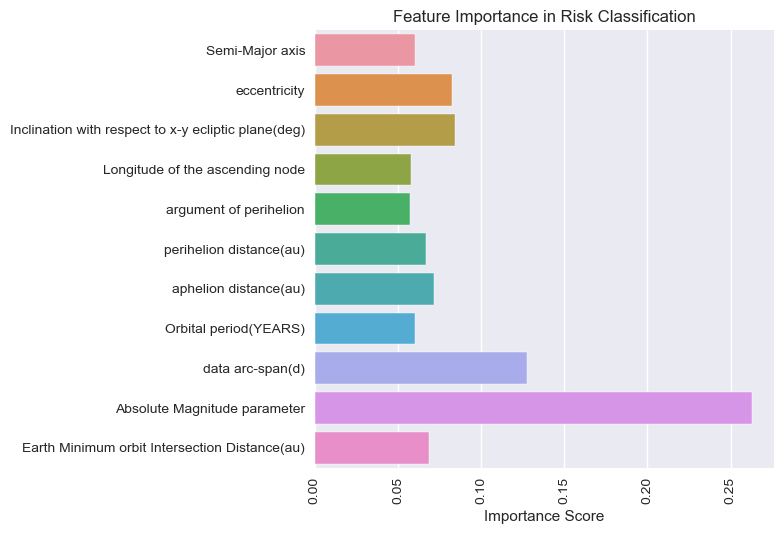

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------- STEP 0: Clean and Prepare Data -------------------- #

# Clean columns: remove newline chars and convert to float
df_new['diameter'] = df_new['diameter'].astype(str).str.replace('\n', '', regex=True).astype(float)
df_new['Earth Minimum orbit Intersection Distance(au)'] = (
    df_new['Earth Minimum orbit Intersection Distance(au)']
    .astype(str).str.replace('\n', '', regex=True).astype(float)
)

# -------------------- STEP 1: Create Risk Labels -------------------- #

# Create hazard score: large + close = dangerous
df_new['hazard_score'] = df_new['diameter'] / df_new['Earth Minimum orbit Intersection Distance(au)']

# Remove infinite or NaN hazard scores
df_new = df_new.replace([np.inf, -np.inf], np.nan)
df_new = df_new.dropna(subset=['hazard_score'])

# Bin hazard_score into 3 quantile-based classes
df_new['risk_level'] = pd.qcut(df_new['hazard_score'], q=3, labels=[0, 1, 2]).astype(int)

# Check class balance
print("Class distribution:\n", df_new['risk_level'].value_counts())

# -------------------- STEP 2: Prepare Features -------------------- #

# Drop 'geometric albedo' due to heavy NaNs
feature_cols = [
    'Semi-Major axis', 'eccentricity', 'Inclination with respect to x-y ecliptic plane(deg)',
    'Longitude of the ascending node', 'argument of perihelion', 'perihelion distance(au)',
    'aphelion distance(au)', 'Orbital period(YEARS)', 'data arc-span(d)',
    'Absolute Magnitude parameter', 'Earth Minimum orbit Intersection Distance(au)'
]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_new[feature_cols])
y = df_new['risk_level']

# -------------------- STEP 3: Scale + Split Data -------------------- #

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------- STEP 4: Train Classifier -------------------- #

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# -------------------- STEP 5: Evaluate -------------------- #

y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------- STEP 6: Feature Importance Plot -------------------- #

importances = clf.feature_importances_
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importance in Risk Classification")
plt.xlabel("Importance Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [134]:
import joblib

joblib.dump(clf, 'neo_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')


['imputer.pkl']

In [135]:
import os
print(os.listdir())  # shows files in current working directory


['.git', '.ipynb_checkpoints', 'Asteroid.csv', 'Asteroid_Dataset.csv', 'asteroid_diameter_prediction.ipynb', 'imputer.pkl', 'neo_model.pkl', 'README.md', 'scaler.pkl']
